Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Niccolo von Bueren"
COLLABORATORS = "Ellie, Henry, Tejes"

# Physics C170M/270M Lab 2: Naive Bayes 

In this lab, you will
- Incorporate the 8 steps of machine learning 
- Calculate a small Naive Bayes problem by hand
- Code a Gaussian Naive Bayes model to analyze the iris dataset. 
- Use scikit-learn and Naive Bayes models to make predictions
- Application of Naive Bayes in Astrophysics: classify stars at the center of our Galaxy

Reminder: save and checkpoint often!

Lab Created by: Tuan Do & Bernie Boscoe

Last updated by: Tuan Do

---

# Naive Bayes exercise by hand, with machine learning language
Bayes theorem:
$P(A \mid B) = \frac{P(A, B)}{P(B)} = \frac{P(B\mid A) \times P (A)}{P(B)}$
Basically, we are trying to find probability of event A, given the event B is true. Event B is also termed as evidence.
P(A) is the prior of A (the prior probability, i.e. Probability of event before evidence is seen). The evidence is an attribute value of an unknown instance(here, it is event B).
P(A|B) is a posteriori probability of B, i.e. probability of event after evidence is seen.

Let $(x_{1},x_{2},…,x_{p})$ be a feature vector and y be the class label corresponding to this feature vector.
Applying Bayes’ theorem,

$$P(y \mid X) = \frac{P(X, y)}{P(X)} = \frac{P(X\mid y) \times P (y)}{P(X)}$$

where X is given as $ X=(x_{1},x_{2},…,x_{p})$. 
By substituting for X and expanding using the chain rule we get,

$$P(y \mid x_{1}, x_{2},..., x_{p}) = \frac{P(x_{1}, x_{2},..., x_{p}, y)}{P(x_{1}, x_{2},..., x_{p})} = \frac{P(x_{1}, x_{2},..., x_{p}\mid y) \times P (y)}{P(x_{1}, x_{2},..., x_{p})}$$

Since $ (x_{1},x_{2},…,x_{p})$ are independent of each other,

$$P(y \mid x_{1}, x_{2},..., x_{p}) = \frac{P (y) \times \prod_{i=1}^{p} P(x_{i} \mid y)}{\prod_{i=1}^{p} P(x_{i})}$$

For all entries in the dataset, the denominator does not change, it remains constant. Therefore, the denominator can be removed and a proportionality can be introduced:

$$P(y \mid x_{1}, x_{2},..., x_{p}) \propto P (y) \times \prod_{i=1}^{p} P(x_{i} \mid y)$$

In our scikit learn exercise, the response variable (y) has only two outcomes, binary (e.g., yes or no / positive or negative). There could be cases where the classification could be multivariate.

To complete the specification of our classifier, we adopt the MAP (Maximum A Posteriori) decision rule, which assigns the label to the class with the highest posterior.

$$\hat{y} = p(X, y) = p(y, x_{1}, x_{2},..., x_{p}) = \operatorname*{argmax}_{k \in \{1,2, ...,K\}} P (y) \times \prod_{i=1}^{p} P(x_{i} \mid y)$$

We calculate probability for all ‘K’ classes using the above function and take one with the maximum value to classify a new point belongs to that class.




Let's look at a naive bayes by hand example, using data science jargon. The data we will use is various aspects of weather conditions and a binary outcome, whether or not one plays golf.

The dataset is divided into two parts, namely, feature matrix and the response vector.

The feature matrix contains all the vectors(rows) of dataset in which each vector consists of the value of dependent features. In our dataset, features are ‘Temperature’, ‘Humidity’ and ‘Weather’.
Response vector contains the value of class variable(prediction or output) for each row of feature matrix. In our dataset, the class variable name is ‘Play golf’. Here is a list of the categorical features and the values they take, as well as the binary predicted value.

|Temperature         | Weather         | Humidity   | Play Golf |
| ------------- |-------------| ------|--------|
| Hot   | Sunny | High |Yes|
| Cold     | Rainy      |  Low |No

Let's look at ten events and outcomes:

|Temperature         | Weather         | Humidity   | Play Golf |
| ------------- |-------------| ------|--------|
| Hot   | Sunny | High |Yes|
| Hot    | Rainy      |  High |Yes|
| Hot   | Rainy | High |Yes|
| Cold     | Sunny |  Low |No|
| Hot   | Sunny | Low |No|
| Cold     | Rainy|  Low |No|
| Cold   | Sunny | High |Yes|
| Cold     | Rainy |  Low |No|
| Cold  | Sunny | High |No|
| Cold     | Rainy |  Low |Yes|

Just to clear, an example of a feature vector and corresponding class variable can be: (refer to 1st row of dataset)

X = (Hot, Sunny , High)

y = Yes

So basically, P(y|X) here means, the probability of “playing golf” given that the weather conditions are “Temperature is hot”, "sunny", and “high humidity”.

# Naive assumption

Now, its time to put a naive assumption to the Bayes’ theorem, which is, independence among the features. So now, we split evidence into the independent parts.

Now, if any two events A and B are independent, then,

P(A,B) = P(A)P(B)

So, finally, we are left with the task of calculating $P(y)$ and $P(x_i | y).$

Please note that $P(y)$ is also called the class probability and $P(x_i | y)$ is called the conditional probability.

The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of $P(x_i | y)$.

Let us try to apply the above formula manually on our weather dataset. For this, we need to do some precomputations on our dataset.

We need to find $P(x_i | y_j$) for each $x_i$ in $X$ and $y_j$ in y. 



Fill in the missing values, by computing the priors. (Just use a piece of paper, you will need them for a later question)

<div align="center">Temperature

|| Yes        | No | P(yes)|P(no)
| ------------- |-------------| ------|--------|----|
| Hot   | 3| 1 |3/5|1/5|
| Cold    | 2      | ?|P(Cold \| yes)=?|P(Cold \| no)=?|
| Total   |5| 5 |100%|100%|
</div>

<div align="center">Weather

|| Yes        | No | P(yes)|P(no)
| ------------- |-------------| ------|--------|----|
| Sunny   | 2| 3 |2/5|3/5|
| Rainy   | ?     |  ?|P(rainy \| yes)=?|P(Rainy \| no)=?|
| Total   |5| 5 |100%|100%|
</div>

<div align="center">Humidity

|| Yes        | No | P(yes)|P(no)
| ------------- |-------------| ------|--------|----|
| High   | 4| 1 |4/5|1/5|
| Low  | ?     |  ?|?|?|
| Total   |5| 5 |100%|100%|
</div>

## Question 1

(2 pts.) So, in the figures above, we have calculated $P(x_i | y_j)$ for each $x_i$ in $X$ and $y_j$ in $y $ manually in the tables 1-4. For example, probability of playing golf given that the temperature is cool, i.e P(temp. = cold | play golf = Yes) = 2/5.

Also, we need to find class probabilities $(P(y))$. For example, P(play golf = Yes) = 5/10.
<div align="center">Play Golf 
    

| Play     | P(yes)|P(no)
| ------------- | ------|--------|
| Yes |  5|?|
|No | 5|5/10|
| Total   |10| 100%|
</div>

today = (Sunny, Hot, Low)

so $P(Yes|today)$ = $P(Sunny | Yes)* P(Hot | Yes) * P(Low | Yes) * P(Yes)$ (we can ignore denominator)
= ?

<b style="color:red">Type in the four fractions below, and the result when you multiply them together.</b>

$P(Yes|today) = \frac{2}{5} * \frac{3}{5} * \frac{1}{5} * \frac{5}{10} = \frac{6}{250}$

## Question 2

(1 pt.) Now, what is P(No | Today)?
Next, convert these two values into probabilities by making the sum equal to 1 (normalization):  example: P(Yes|today)/ P(Yes |today) + P(No | today)
<b style="color:red">Write the probability that golf will be played today.
How likely is it golf will be played today?</b>

$P(No|Today) = \frac{3}{5} * \frac{1}{5} * \frac{4}{5} * \frac{5}{10} = \frac{12}{250}$



# Iris Classification with Naive Bayes

In this part of the assignment, you will again use the [Iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html). Recall, it consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. For a reference, see the following papers:

- R. A. Fisher. "The use of multiple measurements in taxonomic problems". Annals of Eugenics. 7 (2): 179–188, 1936.

Your goal is to construct a Naive Bayes classifier model that predicts the correct class from the sepal length and sepal width features. This lab will help learn about using probability distributions in the Naive Bayes classifier. 

In [2]:
# run this cell
#### PACKAGE IMPORTS ####
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.metrics import accuracy_score
from sklearn import datasets, model_selection
import pandas as pd
import seaborn as sns
%matplotlib inline

# Step 1: Look at the big picture

What is the problem you want to solve? How do you plan to use and benefit from the the machine learning model? What is your metric for success?

In this exercise, we will give you the goal and the metric:

**Machine Learning Goal**: classify irises based on the measurement of their petals. 

**Metric**: accuracy - defined as the number of correctly typed irises divided by the total number of irises


# Step 2: Get the data

What data are available to you for training your model? How will you access and download all the data? The type and quantity of data available will often impact your choice in the subsequent stages. 

Scikit Learn has a bunch of pre-built machine learning datasets that are helpful for learning new models and testing. 
#### Load and prepare the data

We will first read in the Iris dataset, and then split the dataset into training and test sets. The extra cell below the code solution is provided to check your work.

## Question 3


In [3]:
# (1 pt.) Load the iris dataset (hint: see how Lab 1 loaded the Iris dataset)
# YOUR CODE HERE
iris = datasets.load_iris()
iris_training_data = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns = iris['feature_names'] + ['target'])
#iris_test_sets = pd.DataFrame(data = iris['target'], columns = iris['target'] IGNORE
#iris_training_data IGNORE

# Step 3: Explore the data

Discover and visualize the data to gain insight. For example, are there more representatives of certain types of data than others?


## Question 4
(6 pts)

For this lab, please answer the following questions about your data. Use as many cells and plots as you like. 

<b style="color:red">1. What are the features? What is the label?   
2. Compute some summary statistics about your dataset. For example, the number of samples, mean, median, dispersion of the features.   
3. Plot some of the features to get a sense of the data.</b>

In [4]:
#Answer 1
print(iris['feature_names'])
#WTF ARE THE LABELS?

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
#Answer 2
n = np.shape(iris_training_data)[0]
print(f"The number of samples is: {n} \n")
print(f"The mean of the data is: \n{iris_training_data.mean()} \n")
print(f"The Standard Deviation of the data is: \n{iris_training_data.std()} \n")
#WTF IS DISPERSION OF FEATURES?

The number of samples is: 150 

The mean of the data is: 
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
target               1.000000
dtype: float64 

The Standard Deviation of the data is: 
sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
target               0.819232
dtype: float64 



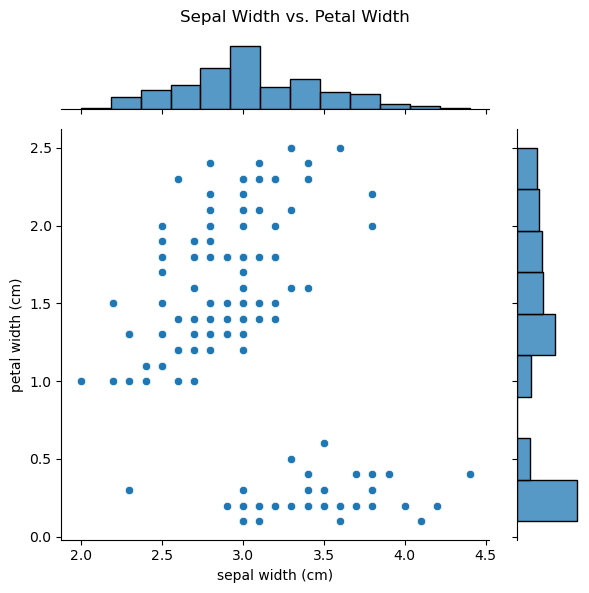

In [6]:
#Answer 3
#sns.heatmap(iris_training_data.corr(), annot = True).set(title = "Iris Data Correlations");
plot = sns.jointplot(data = iris_training_data, x = "sepal width (cm)", y = "petal width (cm)")
plot.fig.suptitle("Sepal Width vs. Petal Width")
plot.fig.tight_layout()

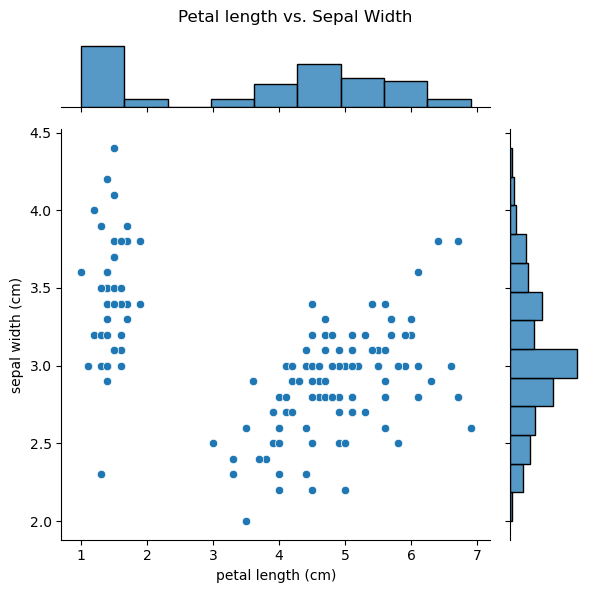

In [7]:
plot_2 = sns.jointplot(data = iris_training_data, x = "petal length (cm)", y = "sepal width (cm)")
plot_2.fig.suptitle("Petal length vs. Sepal Width")
plot_2.fig.tight_layout()

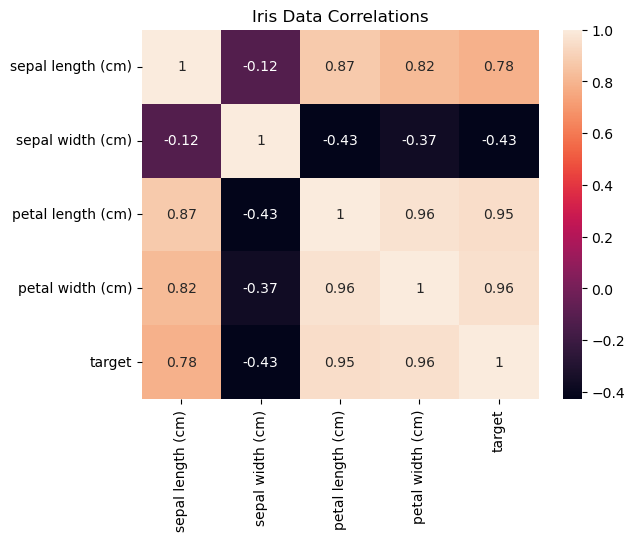

In [8]:
sns.heatmap(iris_training_data.corr(), annot = True).set(title = "Iris Data Correlations");

# Step 4: Prepare the data for ML algorithms

Machine learning algorithms often require data to be pre-processed in a certain way, such as scaling numerical values or map categories to other representations. You will also need to decide what data to use as training and as testing. You may also need to develop a strategy to deal with missing data. 

Use only the first two features: **sepal length** and **width** for this assignment

## Question 5

In [9]:
# (1 pt.) Create an array called data with the sepal length and width features and
# Create an array called targets with the target values
# YOUR CODE HERE
data = [[iris_training_data.iloc[x][0],iris_training_data.iloc[x][1]] for x in range(0,n)]
#sepal_width = [iris_training_data.iloc[x][1] for x in range(0,n)]

#print(data)

targets = [iris_training_data.iloc[x][-1] for x in range(0,n)]


 #raise NotImplementedError()

`sklearn` has a really helpful function called `train_test_split` that helps to randomly split your data and targets for training and testing. Please read the documentation on `train_test_split` before running the following cell. Note that there is an important keyword `test_size`. (Look at what random_seed can do for you as well, we will use that later.)

A short summary of terminology used below:

* **training** - data used in training the machine learning model
* **test** - data used to evaluate the performance of the model. Will use this information to further refine the model. 
* **validation** - the data left aside in the beginning only to be used at the very end when you are finished with your model and want to test on data the model has never seeen. 

In [10]:
# Run this code to randomly shuffle the data and make train and validation splits

x_train_all, x_validate, y_train_all, y_validate = model_selection.train_test_split(data, targets, test_size=0.1)

# now split the training data further into training and testing
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_train_all, y_train_all, test_size=0.2)


In [11]:
x_train_plot = np.array(x_train)
x_test_plot = np.array(x_test)
y_train_plot = np.array(y_train)
y_test_plot = np.array(y_test)

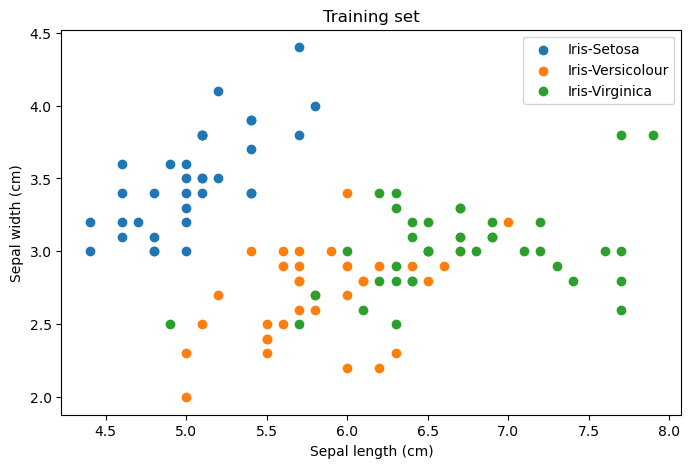

In [12]:
# Example of plotting the training data

labels = {0: 'Iris-Setosa', 1: 'Iris-Versicolour', 2: 'Iris-Virginica'}
label_colours = ['blue', 'orange', 'green']

def plot_data(x, y, labels, colours):
    for c in np.unique(y):
        inx = np.where(y == c)
        plt.scatter(x[inx, 0], x[inx, 1], label=labels[c])
    plt.title("Training set")
    plt.xlabel("Sepal length (cm)")
    plt.ylabel("Sepal width (cm)")
    plt.legend()
    
plt.figure(figsize=(8, 5))
plot_data(x_train_plot, y_train_plot, labels, label_colours)

# Step 5: Select a model and train it

Based on the problem and the data, there are often a handful of algorithms to try. Here, experimentation and knowledge of the strengths and weaknesses of machine learning models will help you choose a model and train it.

In this lab, we will specifically use the Naive Bayes model. 
### Naive Bayes classifier

We will briefly review the Naive Bayes classifier model. The fundamental equation for this classifier is Bayes' rule:

$$
P(Y=y_k | X_1,\ldots,X_d) = \frac{P(X_1,\ldots,X_d | Y=y_k)P(Y=y_k)}{\sum_{k=1}^K P(X_1,\ldots,X_d | Y=y_k)P(Y=y_k)}
$$

In the above, $d$ is the number of features or dimensions in the inputs $X$ (in our case $d=2$), and $K$ is the number of classes (in our case $K=3$). The distribution $P(Y)$ is the class prior distribution, which is a discrete distribution over $K$ classes. The distribution $P(X | Y)$ is the class-conditional distribution over inputs.

The Naive Bayes classifier makes the assumption that the data features $X_i$ are conditionally independent give the class $Y$ (the 'naive' assumption). In this case, the class-conditional distribution decomposes as

$$
\begin{align}
P(X | Y=y_k) &= P(X_1,\ldots,X_d | Y=y_k)\\
&= \prod_{i=1}^d P(X_i | Y=y_k)
\end{align}
$$

This simplifying assumption means that we typically need to estimate far fewer parameters for each of the distributions $P(X_i | Y=y_k)$ instead of the full joint distribution $P(X | Y=y_k)$.

Once the class prior distribution and class-conditional densities are estimated, the Naive Bayes classifier model can then make a class prediction $\hat{Y}$ for a new data input $\tilde{X} := (\tilde{X}_1,\ldots,\tilde{X}_d)$ according to

$$
\begin{align}
\hat{Y} &= \text{argmax}_{y_k} P(Y=y_k | \tilde{X}_1,\ldots,\tilde{X}_d) \\
&= \text{argmax}_{y_k}\frac{P(\tilde{X}_1,\ldots,\tilde{X}_d | Y=y_k)P(Y=y_k)}{\sum_{k=1}^K P(\tilde{X}_1,\ldots,\tilde{X}_d | Y=y_k)P(Y=y_k)}\\
&= \text{argmax}_{y_k} P(\tilde{X}_1,\ldots,\tilde{X}_d | Y=y_k)P(Y=y_k)
\end{align}
$$

For this lab, we will use **Gaussian distributions** to describe the distribution of sepal length and width for each of the classes of irises. 

## 5a Compute the Priors
First, let's compute the priors for observing either three iris species. Without more information, we'll just use the fraction of each classes in the training data as the prior on that class. 

In [13]:
total = len(y_train_plot)
c = 0
prob = []
for c in np.unique(y_train_plot):
    temp = np.where(y_train_plot == c)
    number = len(temp[0])
    prob.append(number/total)
    

labels = {0: 'Iris-Setosa', 1: 'Iris-Versicolour', 2: 'Iris-Virginica'}
print(f'The probabilities of seeing a Iris-Setosa is: ~{round(prob[0]*100,2)}%. \nThe probabilities of seeing a Iris-Versicolour is: ~{round(prob[1]*100,2)}%. \nThe probability of seeing a Iris-Virginica is: ~{round(prob[2]*100,2)}%.')

The probabilities of seeing a Iris-Setosa is: ~31.48%. 
The probabilities of seeing a Iris-Versicolour is: ~32.41%. 
The probability of seeing a Iris-Virginica is: ~36.11%.


## Question 6

In [14]:
# (1 pt.) Create an array called priors that has the prior probability of observing each class.
# Be sure to keep track of which class belongs to which element of the array!
# YOUR CODE HERE

#Already did this

print(prob)

[0.3148148148148148, 0.32407407407407407, 0.3611111111111111]


## 5b Build the Naive Bayes Classifier



## Question 7

<b style="color:red">Build the Naive Bayes Classifier using Gaussian distributions. </b>

In [15]:
# (3 pt.) Build Classifier here
# YOUR CODE HERE

I_set_length = []
I_set_width = []
I_ver_length = []
I_ver_width = []
I_vir_length = []
I_vir_width = []


f = 0
for i in y_train_plot:
    if i == 0.0:
        I_set_length.append(x_train_plot[f][0])
        I_set_width.append(x_train_plot[f][1])
    elif i == 1.0:
        I_ver_length.append(x_train_plot[f][0])
        I_ver_width.append(x_train_plot[f][1])
    else:
        I_vir_length.append(x_train_plot[f][0])
        I_vir_width.append(x_train_plot[f][1])
    f += 1
    
def Gaussian(sigma, x, mu):
    return 1 / (np.sqrt(2*np.pi*sigma**2)) * np.exp(- (x-mu)**2 / sigma**2)
    

    
std_length_I_set = np.std(I_set_length)
std_length_I_ver = np.std(I_ver_length)
std_length_I_vir = np.std(I_vir_length)
std_width_I_set = np.std(I_set_width)
std_width_I_ver = np.std(I_ver_width)
std_width_I_vir = np.std(I_vir_width)

ave_length_I_set = np.average(I_set_length)
ave_width_I_set = np.average(I_set_width)
ave_length_I_vir = np.average(I_vir_length)
ave_width_I_vir = np.average(I_vir_width)
ave_length_I_ver = np.average(I_ver_length)
ave_width_I_ver = np.average(I_set_width)

def Naive_set(x, std_length_I_set, ave_length_I_set, std_width_I_set, ave_width_I_set, prob):
    return prob[0] * (Gaussian(std_length_I_set, x[0], ave_length_I_set) * Gaussian(std_width_I_set, x[1], ave_width_I_set))

def Naive_ver(x, std_length_I_ver, ave_length_I_ver, std_width_I_ver, ave_width_I_ver, prob):
    return prob[1] * (Gaussian(std_length_I_ver, x[0], ave_length_I_ver) * Gaussian(std_width_I_ver, x[1], ave_width_I_ver))

def Naive_vir(x, std_length_I_vir, ave_length_I_vir, std_width_I_vir, ave_width_I_vir, prob):
    return prob[2] * (Gaussian(std_length_I_vir, x[0], ave_length_I_vir) * Gaussian(std_width_I_vir, x[1], ave_width_I_vir))

## 5c Train the model

Training the model in this case is to determine the parameters of the Gaussians describing the joint probability of observing the sepal length or width with respect to the class. 


## Question 8

(3 pt.)<b style="color:red"> Using as many cells as you need, determine the parameters for the joint probability distribution.</b>

In [16]:
def Joint_prob(element, std_length_I_set, ave_length_I_set, std_length_I_ver, ave_length_I_ver, std_length_I_vir, ave_length_I_vir, std_width_I_set, ave_width_I_set, std_width_I_ver, ave_width_I_ver, std_width_I_vir, ave_width_I_vir, prob):
    Joint_denom = (Naive_set(element, std_length_I_set, ave_length_I_set, std_width_I_set, ave_width_I_set, prob) + Naive_ver(element, std_length_I_ver, ave_length_I_ver, std_width_I_ver, ave_width_I_ver, prob) + Naive_vir(element, std_length_I_vir, ave_length_I_vir, std_width_I_vir, ave_width_I_vir, prob))
    confidence = []
    confidence.append(Naive_set(element, std_length_I_set, ave_length_I_set, std_width_I_set, ave_width_I_set, prob) / Joint_denom)
    confidence.append(Naive_ver(element, std_length_I_ver, ave_length_I_ver, std_width_I_ver, ave_width_I_ver, prob) / Joint_denom)
    confidence.append(Naive_vir(element, std_length_I_vir, ave_length_I_vir, std_width_I_vir, ave_width_I_vir, prob) / Joint_denom)
    return confidence

## 5d Test the model predictions

`sklearn` comes with a lot of useful routines to compute metrics for machine learning applications. In this lab, you'll use `accuracy_score` from `sklearn.metrics` to compute the model accuracy.

## Question 9

In [17]:
# (1 pt.) make a array called pred that is your prediction for most likely class given your test data
# YOUR CODE HERE

pred = []

for element in x_test:
    pred.append(Joint_prob(element, std_length_I_set, ave_length_I_set, std_length_I_ver, ave_length_I_ver, std_length_I_vir, ave_length_I_vir, std_width_I_set, ave_width_I_set, std_width_I_ver, ave_width_I_ver, std_width_I_vir, ave_width_I_vir, prob))

pred_submit = []


for g in range(0,len(pred)):
    if (pred[g][0] > pred[g][1] and pred[g][0] > pred[g][2]):
        pred_submit.append(0.0)
    elif (pred[g][0] < pred[g][1] and pred[g][1] > pred[g][2]):
        pred_submit.append(1.0)
    else:
        pred_submit.append(2.0)
print(pred_submit)

[2.0, 2.0, 0.0, 2.0, 1.0, 2.0, 2.0, 2.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 0.0, 1.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 2.0, 2.0, 0.0]


In [18]:
# this line will give you your accuracy score for the test data
score = accuracy_score(y_test, pred_submit)
print(score)

0.6296296296296297


62.9%!!!

## Question 10

For this case, we will not modify our model, so we can just go ahead evaluate the accuracy of the validation data that you saved earlier. 

<b style="color:red">Below, find the accuracy of the validation data. </b>

In [19]:
# (1pt.) determine the accuracy score of your validation data

pred = []

pred_submit = []

for element in x_validate:
    pred.append(Joint_prob(element, std_length_I_set, ave_length_I_set, std_length_I_ver, ave_length_I_ver, std_length_I_vir, ave_length_I_vir, std_width_I_set, ave_width_I_set, std_width_I_ver, ave_width_I_ver, std_width_I_vir, ave_width_I_vir, prob))


for g in range(0,len(pred)):
    if (pred[g][0] > pred[g][1] and pred[g][0] > pred[g][2]):
        pred_submit.append(0.0)
    elif (pred[g][0] < pred[g][1] and pred[g][1] > pred[g][2]):
        pred_submit.append(1.0)
    else:
        pred_submit.append(2.0)
        

score_val = accuracy_score(y_validate, pred_submit)
print(score_val)

0.7333333333333333


Congratulations! You have now completed the iris classification. In this iris classification, we won't go through Steps 6 to 8 of the machine learning workflow, but we will in the next part of this lab. 

# Classifying Stars at the Galactic Center

The Galactic center contains a complex population of stars. Multiple generations of star formation have occured, including as recently as 4 to 6 million years ago. The most reliable way to determine the ages of the stars is measure their spectra to examine their spectral features. Generally stars near the supermassive black hole in Galactic center are old (> 1 billion years) or young (4-6 million years). The stars that are bright enough for us to see are young stars and massive (> 10 Msun) with high surface temperatures (>20,000K), or old stars in their red giant phase with lower mass (~1 Msun) and cool temperatures (3000 to 4000 K). This difference in temperature leads to very different spectral features. 

In the spectra below, there are two examples of young stars and one example of an old star. The young star spectra are classified as 'early-type'. Because the temperature is high, many electrons have been ionized from atoms in its atmosphere so few absorption lines remain. The most prominent absorption line for early-type stars in this wavelength region is from hydrogen (specifically, the Brackett gamma line). Sometimes, the temperature is so high that even the electron in hydrogen is ionized, so there is very little hydrogen absorption. For the old red-giant stars, the temperatures are fairly low, so there are now many atomic absorption lines. The strongest lines in this wavelength range are from sodium (Na) atoms. In addition, because the temperature is cool, the hydrogen lines become less prominant because there is not enough high energy photons that are available to make those absorption lines. 

![gc_spectra](gc_spectra.png)

## Feature Engineering: Equivalent Widths and Cross-Correlation

To simplify and automate the process of classifying stars, we can reduce the spectrum (flux measurements at different wavelengths) into a more compact representation that hopefully still carries a lot of the information necessary for classification. In this case, we pick the strongest spectral lines (Br gamma and Na) and turn them into features for our machine learning models. We will use the concept of equilvalent width, which is related to the depth of the absorption features. In the figure above, the shaded blue regions represent the equivalent widths of the lines. The stronger the lines, the large the equivalent widths. For more details see: https://en.wikipedia.org/wiki/Equivalent_width. We will define positive equivalent widths as absorption lines (like in the figure above), and negative equivalent widths as emission lines. 

We will also use the cross-correlation coefficient of the spectra with templates as a potential feature. This feature is the maximum from cross-correlating a template young star and old star spectrum with the observed spectrum. You can think of this correlation coefficient as how closely matched the observed spectrum is with a template spectrum. The correlation in principle should go from 0 to 1. With 0 meaning it is not at all alike and 1 being an identical match. The correlation coefficent given in the data for this lab varies widely because the observed spectra often have more noise the the spectrum above and we only cross correlate the observed spectra with one model young star and one model old star. There are also intrinsic variations in the spectra that can also reduce the correlations. 

The dataset you'll be using has the equivalent widths and cross correlation coefficient measured using an automated method for spectra that have first been classified by humans, so there are labels. 

# Step 1: Look at the big picture

What is the problem you want to solve? How do you plan to use and benefit from the the machine learning model? What is your metric for success?

In this lab, we will give you the goal and the metric

**Lab goal**: classify stars at the Galactic center into young or old. 

**Metric**: accuracy - defined as the number of correctly typed stars divided by the total number of stars


# Step 2: Get the data

What data are available to you for training your model? How will you access and download all the data? The type and quantity of data available will often impact your choice in the subsequent stages. 

Here, the data is straightforward. We have provided you with the training data in the file ``galactic_center_stars_training.csv``

In the training data, there should be 8 columns: Na equivalent width, Na equivalent width error, correlation coefficient with an old star template, Br gamma equivalent width, Br gamma equivalent width uncertainty, signal-to-noise ratio of the spectrum, and young or old. The units of equilvalent widths and their uncertainties are in Angstroms. The correlation coefficients are unit-less. 

There is also a file called ``galactic_center_stars_eval.csv`` that has no labels. We'll be using that file to grade this assignment. 


## Question 11

In [20]:
# (1 pt.) In this cell, load the training data and the data for grading into two pandas data frames. 
# and check that they are there by looking at each head.
# YOUR CODE HERE

stars = pd.read_csv("galactic_center_stars_training.csv")
stars_answers = pd.read_csv("galactic_center_stars_eval.csv")
stars_training_data = pd.DataFrame(data = stars)
stars_answers_data = pd.DataFrame(data = stars_answers)

# Step 3: Explore the data

Discover and visualize the data to gain insight. For example, how complete is the dataset? Are there more representatives of certain types of data than others?


## Question 12
(6 pts)

For this lab, please answer the following questions about your data. Use as many cells and plots as you like. 

<b style="color:red">1. What are the features? What is the label?   
2. Compute some summary statistics about your dataset. For example, the number of samples, mean, median, dispersion of the features.   
3. Plot some of the features to get a sense of the data. </b>

In [21]:
# use as many cells as you need to explore the data. We will be grading manually
#ANSWER 1
print(f"The features are: {stars_training_data.columns.values}. These represent Sodium spectral line strength, Bromide spectrum line lengths, and age of the star. With the age being the labels.")

The features are: ['Na' 'Na_err' 'Corr' 'Br' 'Br_err' 'Yng_corr' 'SNR' 'Type']. These represent Sodium spectral line strength, Bromide spectrum line lengths, and age of the star. With the age being the labels.


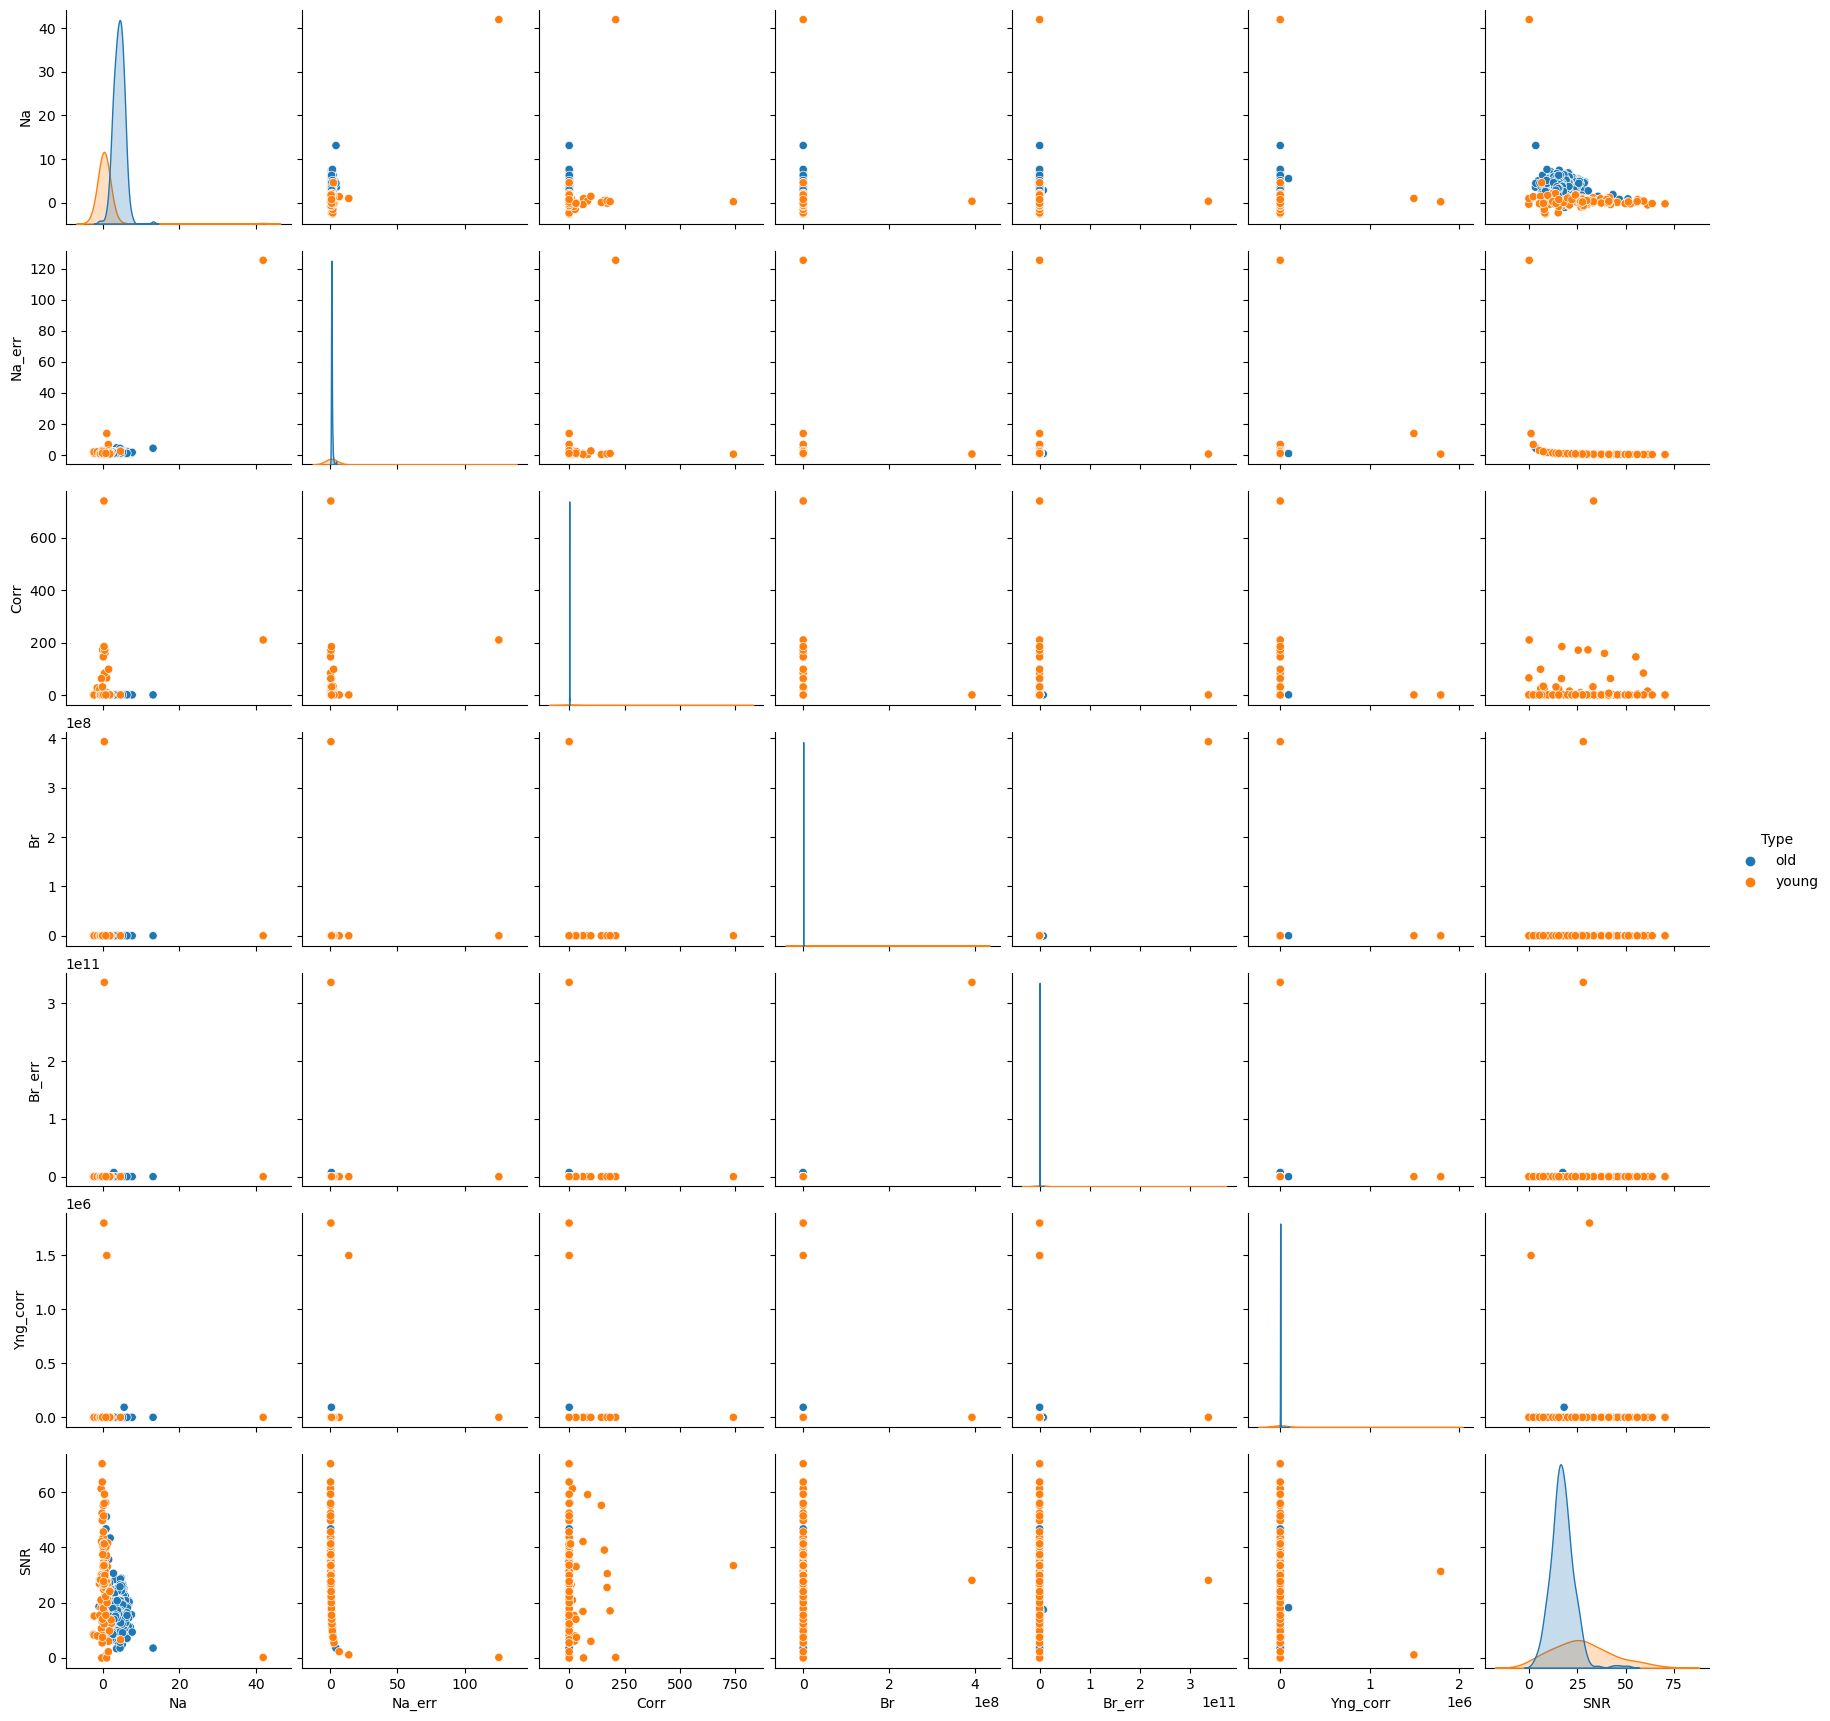

In [22]:
# You can try sns.pairplot(train_tab, hue="Type")

sns.pairplot(stars_training_data, hue = "Type")

In [23]:
print(stars_training_data.mean())
print(stars_training_data.std())
print(np.shape(stars_training_data))

Na          3.114630e+00
Na_err      1.341487e+00
Corr        6.307780e+00
Br          9.379330e+05
Br_err      8.194493e+08
Yng_corr    8.085288e+03
SNR         2.003544e+01
dtype: float64
Na          2.893386e+00
Na_err      6.151558e+00
Corr        4.237773e+01
Br          1.921929e+07
Br_err      1.642226e+10
Yng_corr    1.141227e+05
SNR         1.066495e+01
dtype: float64
(419, 8)


/tmp/ipykernel_980/2053268607.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(stars_training_data.mean())
/tmp/ipykernel_980/2053268607.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(stars_training_data.std())


<AxesSubplot: >

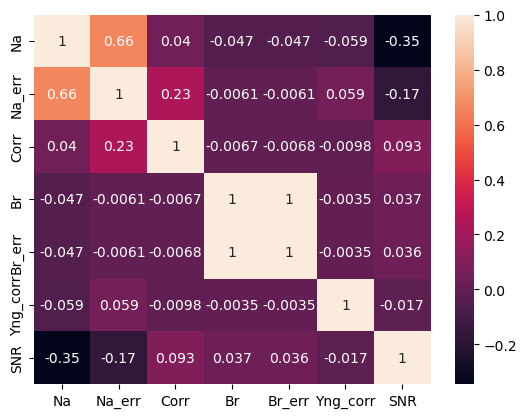

In [24]:
sns.heatmap(stars_training_data.iloc[:,0:7].corr(), annot = True)

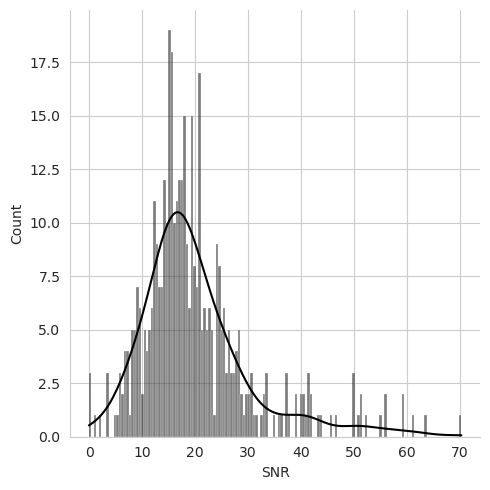

In [25]:
sns.set_style('whitegrid')
sns.displot(data = stars_training_data, x = 'SNR', kde=True, color ='black', bins = 150)

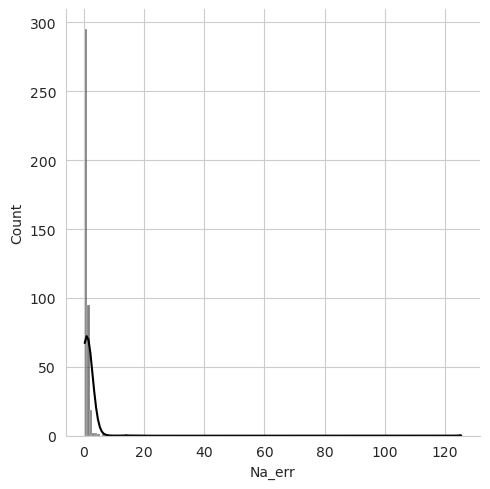

In [26]:
sns.set_style('whitegrid')
sns.displot(data = stars_training_data, x = 'Na_err', kde=True, color ='black', bins = 150)

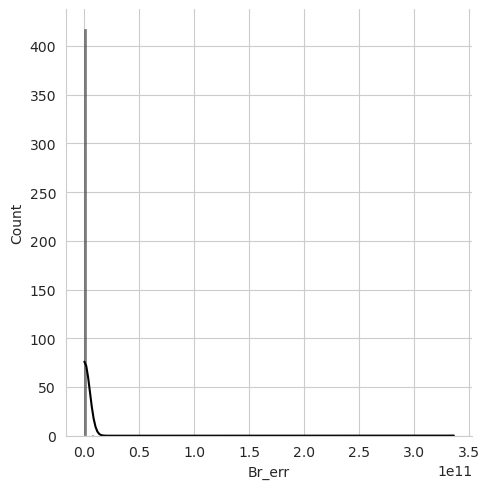

In [27]:
sns.set_style('whitegrid')
sns.displot(data = stars_training_data, x = 'Br_err', kde=True, color ='black', bins = 150)

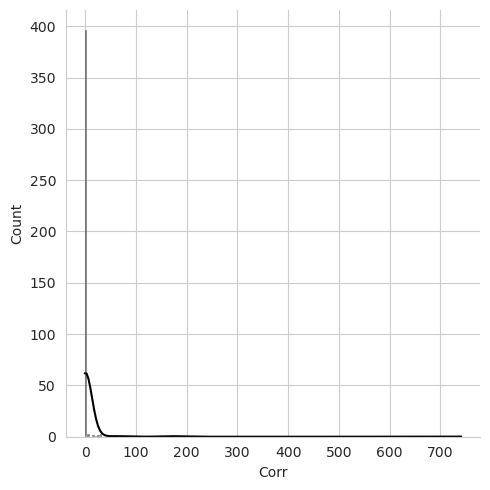

In [28]:
sns.set_style('whitegrid')
sns.displot(data = stars_training_data, x = 'Corr', kde=True, color ='black', bins = 150)

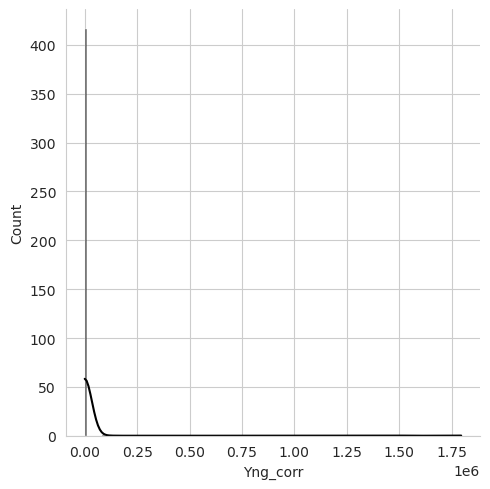

In [29]:
sns.set_style('whitegrid')
sns.displot(data = stars_training_data, x = 'Yng_corr', kde=True, color ='black', bins = 150)

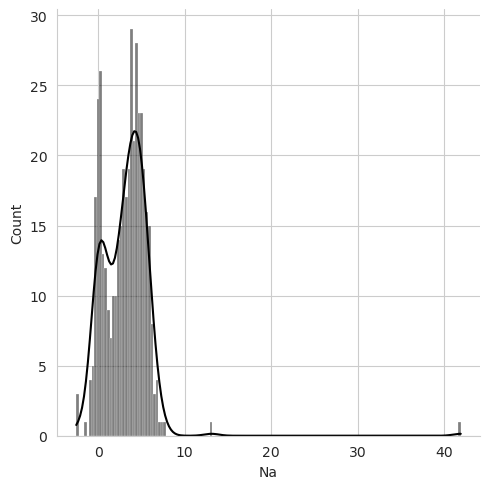

In [30]:
sns.set_style('whitegrid')
sns.displot(data = stars_training_data, x = 'Na', kde=True, color ='black', bins = 150)

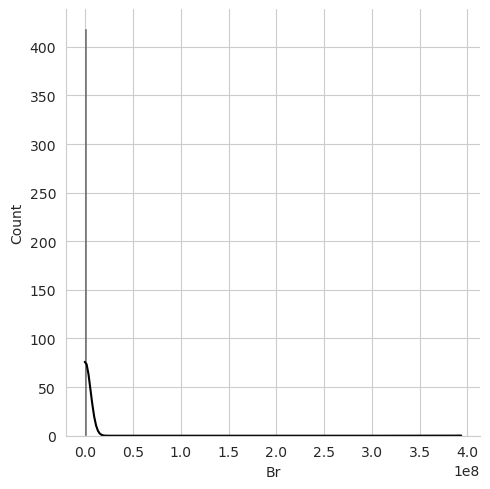

In [31]:
sns.set_style('whitegrid')
sns.displot(data = stars_training_data, x = 'Br', kde=True, color ='black', bins = 150)

# Step 4: Prepare the data for ML algorithms

Machine learning algorithms often require data to be pre-processed in a certain way, such as scaling numerical values or map categories to other representations. You will also need to decide what data to use as training and as testing. You may also need to develop a strategy to deal with missing data. 

For this lab, we have already done the feature engineering to get the equivalent widths, their uncertainties, and the correlation coefficients. 

## Question 12
(6 pts)

While the features are already chosen, there are a number of other questions that need to be answered:

<b style="color:red">1. Are there bad data points or outliers?   
2. If there are outliers, what is your strategy for dealing with them?   
3. Apply your strategy for cleaning and dealing with the data, then split your training data into three parts: training, testing, and validation  </b>


There are definetly some bad datapoints as can be seen by the Br_err and Na_err graphs. These will be wiped away to prevent the large error from interfering with the training.

In [32]:
#YES there are some outliers that are FAR beyond reasonable. To remove this we find them, index them, and delete them.

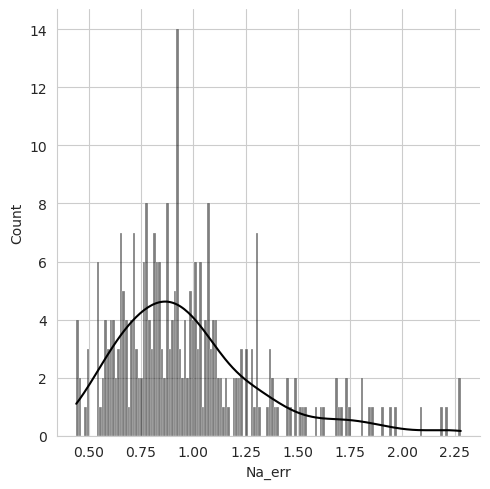

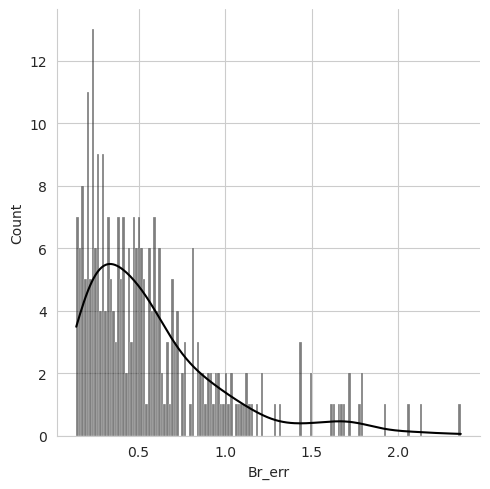

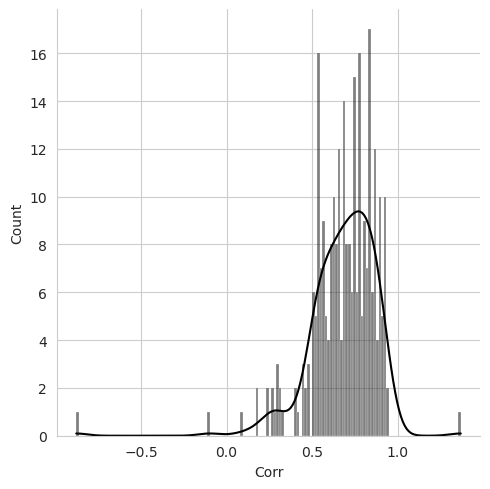

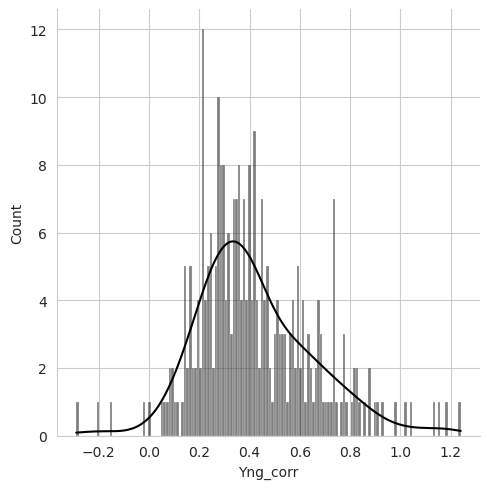

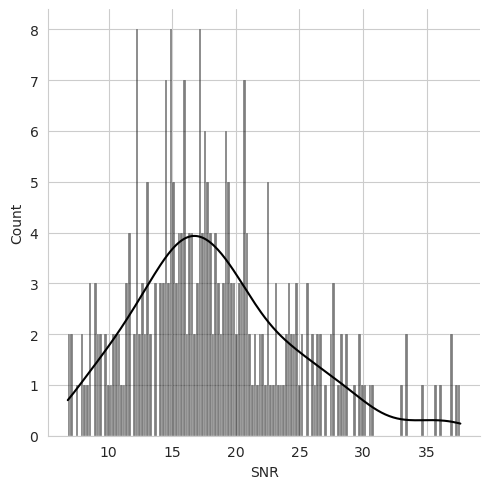

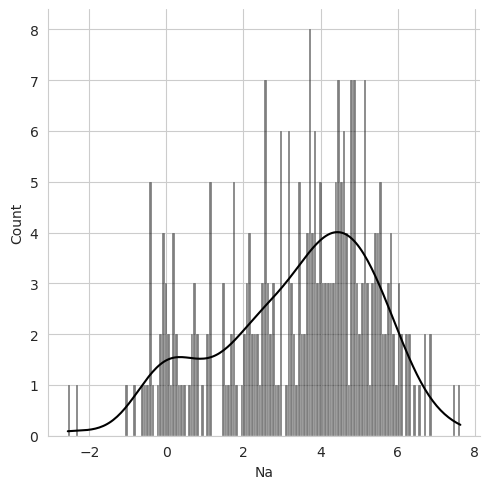

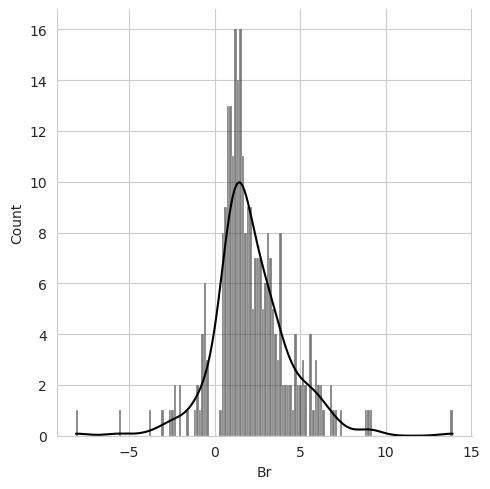

In [33]:
# use as many cells as you need two answer Question 12

clean_stars_training_data = stars_training_data

# NA_ERR DATA

DELETE_GARBAGE = clean_stars_training_data.loc[clean_stars_training_data.Na_err >= 2.5]
index = DELETE_GARBAGE.index
for x in range(0,len(index.to_numpy())):
    clean_stars_training_data.drop(clean_stars_training_data.index[index[-1-x]], inplace=True)

clean_stars_training_data = clean_stars_training_data.reset_index(drop=True)

DELETE_GARBAGE = clean_stars_training_data.loc[clean_stars_training_data.Na_err <= -2.5]
index = DELETE_GARBAGE.index
for x in range(0,len(index.to_numpy())):
    clean_stars_training_data.drop(clean_stars_training_data.index[index[-1-x]], inplace=True)

clean_stars_training_data = clean_stars_training_data.reset_index(drop=True)
    
# END NA _ ERR DATA
    
# START BR_ERR
    
DELETE_GARBAGE = clean_stars_training_data.loc[clean_stars_training_data.Br_err >= 2.5]
index = DELETE_GARBAGE.index
for x in range(0,len(index.to_numpy())):
    clean_stars_training_data.drop(clean_stars_training_data.index[index[-1-x]], inplace=True)
    
clean_stars_training_data = clean_stars_training_data.reset_index(drop=True)

DELETE_GARBAGE = clean_stars_training_data.loc[clean_stars_training_data.Br_err <= -2.5]
index = DELETE_GARBAGE.index
for x in range(0,len(index.to_numpy())):
    clean_stars_training_data.drop(clean_stars_training_data.index[index[-1-x]], inplace=True)
    
clean_stars_training_data = clean_stars_training_data.reset_index(drop=True)

# END BR_ERR

#SRART CORR

DELETE_GARBAGE = clean_stars_training_data.loc[clean_stars_training_data.Corr >= 2]
index = DELETE_GARBAGE.index
for x in range(0,len(index.to_numpy())):
    clean_stars_training_data.drop(clean_stars_training_data.index[index[-1-x]], inplace=True)
    
clean_stars_training_data = clean_stars_training_data.reset_index(drop=True)

DELETE_GARBAGE = clean_stars_training_data.loc[clean_stars_training_data.Corr <= -2]
index = DELETE_GARBAGE.index
for x in range(0,len(index.to_numpy())):
    clean_stars_training_data.drop(clean_stars_training_data.index[index[-1-x]], inplace=True)
    
clean_stars_training_data = clean_stars_training_data.reset_index(drop=True)

#END CORR

#START YNG_CORR

DELETE_GARBAGE = clean_stars_training_data.loc[clean_stars_training_data.Yng_corr >= 1.5]
index = DELETE_GARBAGE.index
for x in range(0,len(index.to_numpy())):
    clean_stars_training_data.drop(clean_stars_training_data.index[index[-1-x]], inplace=True)
    
clean_stars_training_data = clean_stars_training_data.reset_index(drop=True)

DELETE_GARBAGE = clean_stars_training_data.loc[clean_stars_training_data.Yng_corr <= -1.5]
index = DELETE_GARBAGE.index
for x in range(0,len(index.to_numpy())):
    clean_stars_training_data.drop(clean_stars_training_data.index[index[-1-x]], inplace=True)
    
clean_stars_training_data = clean_stars_training_data.reset_index(drop=True)

# END YNG_CORR

#START SNR

DELETE_GARBAGE = clean_stars_training_data.loc[clean_stars_training_data.SNR >= 40]
index = DELETE_GARBAGE.index
for x in range(0,len(index.to_numpy())):
    clean_stars_training_data.drop(clean_stars_training_data.index[index[-1-x]], inplace=True)
    
clean_stars_training_data = clean_stars_training_data.reset_index(drop=True)

DELETE_GARBAGE = clean_stars_training_data.loc[clean_stars_training_data.SNR <= -40]
index = DELETE_GARBAGE.index
for x in range(0,len(index.to_numpy())):
    clean_stars_training_data.drop(clean_stars_training_data.index[index[-1-x]], inplace=True)
    
clean_stars_training_data = clean_stars_training_data.reset_index(drop=True)

#END SNR

sns.set_style('whitegrid')
sns.displot(data = clean_stars_training_data, x = 'Na_err', kde=True, color ='black', bins = 150)

sns.set_style('whitegrid')
sns.displot(data = clean_stars_training_data, x = 'Br_err', kde=True, color ='black', bins = 150)

sns.set_style('whitegrid')
sns.displot(data = clean_stars_training_data, x = 'Corr', kde=True, color ='black', bins = 150)

sns.set_style('whitegrid')
sns.displot(data = clean_stars_training_data, x = 'Yng_corr', kde=True, color ='black', bins = 150)

sns.set_style('whitegrid')
sns.displot(data = clean_stars_training_data, x = 'SNR', kde=True, color ='black', bins = 150)

sns.set_style('whitegrid')
sns.displot(data = clean_stars_training_data, x = 'Na', kde=True, color ='black', bins = 150)

sns.set_style('whitegrid')
sns.displot(data = clean_stars_training_data, x = 'Br', kde=True, color ='black', bins = 150)

# Describe your process and show clean_training.describe()

The strategy used was looking at the initial data and finding where the bell curve ends. Anything beyond a few SD beyond is unreasonable and so that data gets wiped. Importantly, one has to reset the indexing with the dataframe or else everything goes wonky, found that out the fun way.

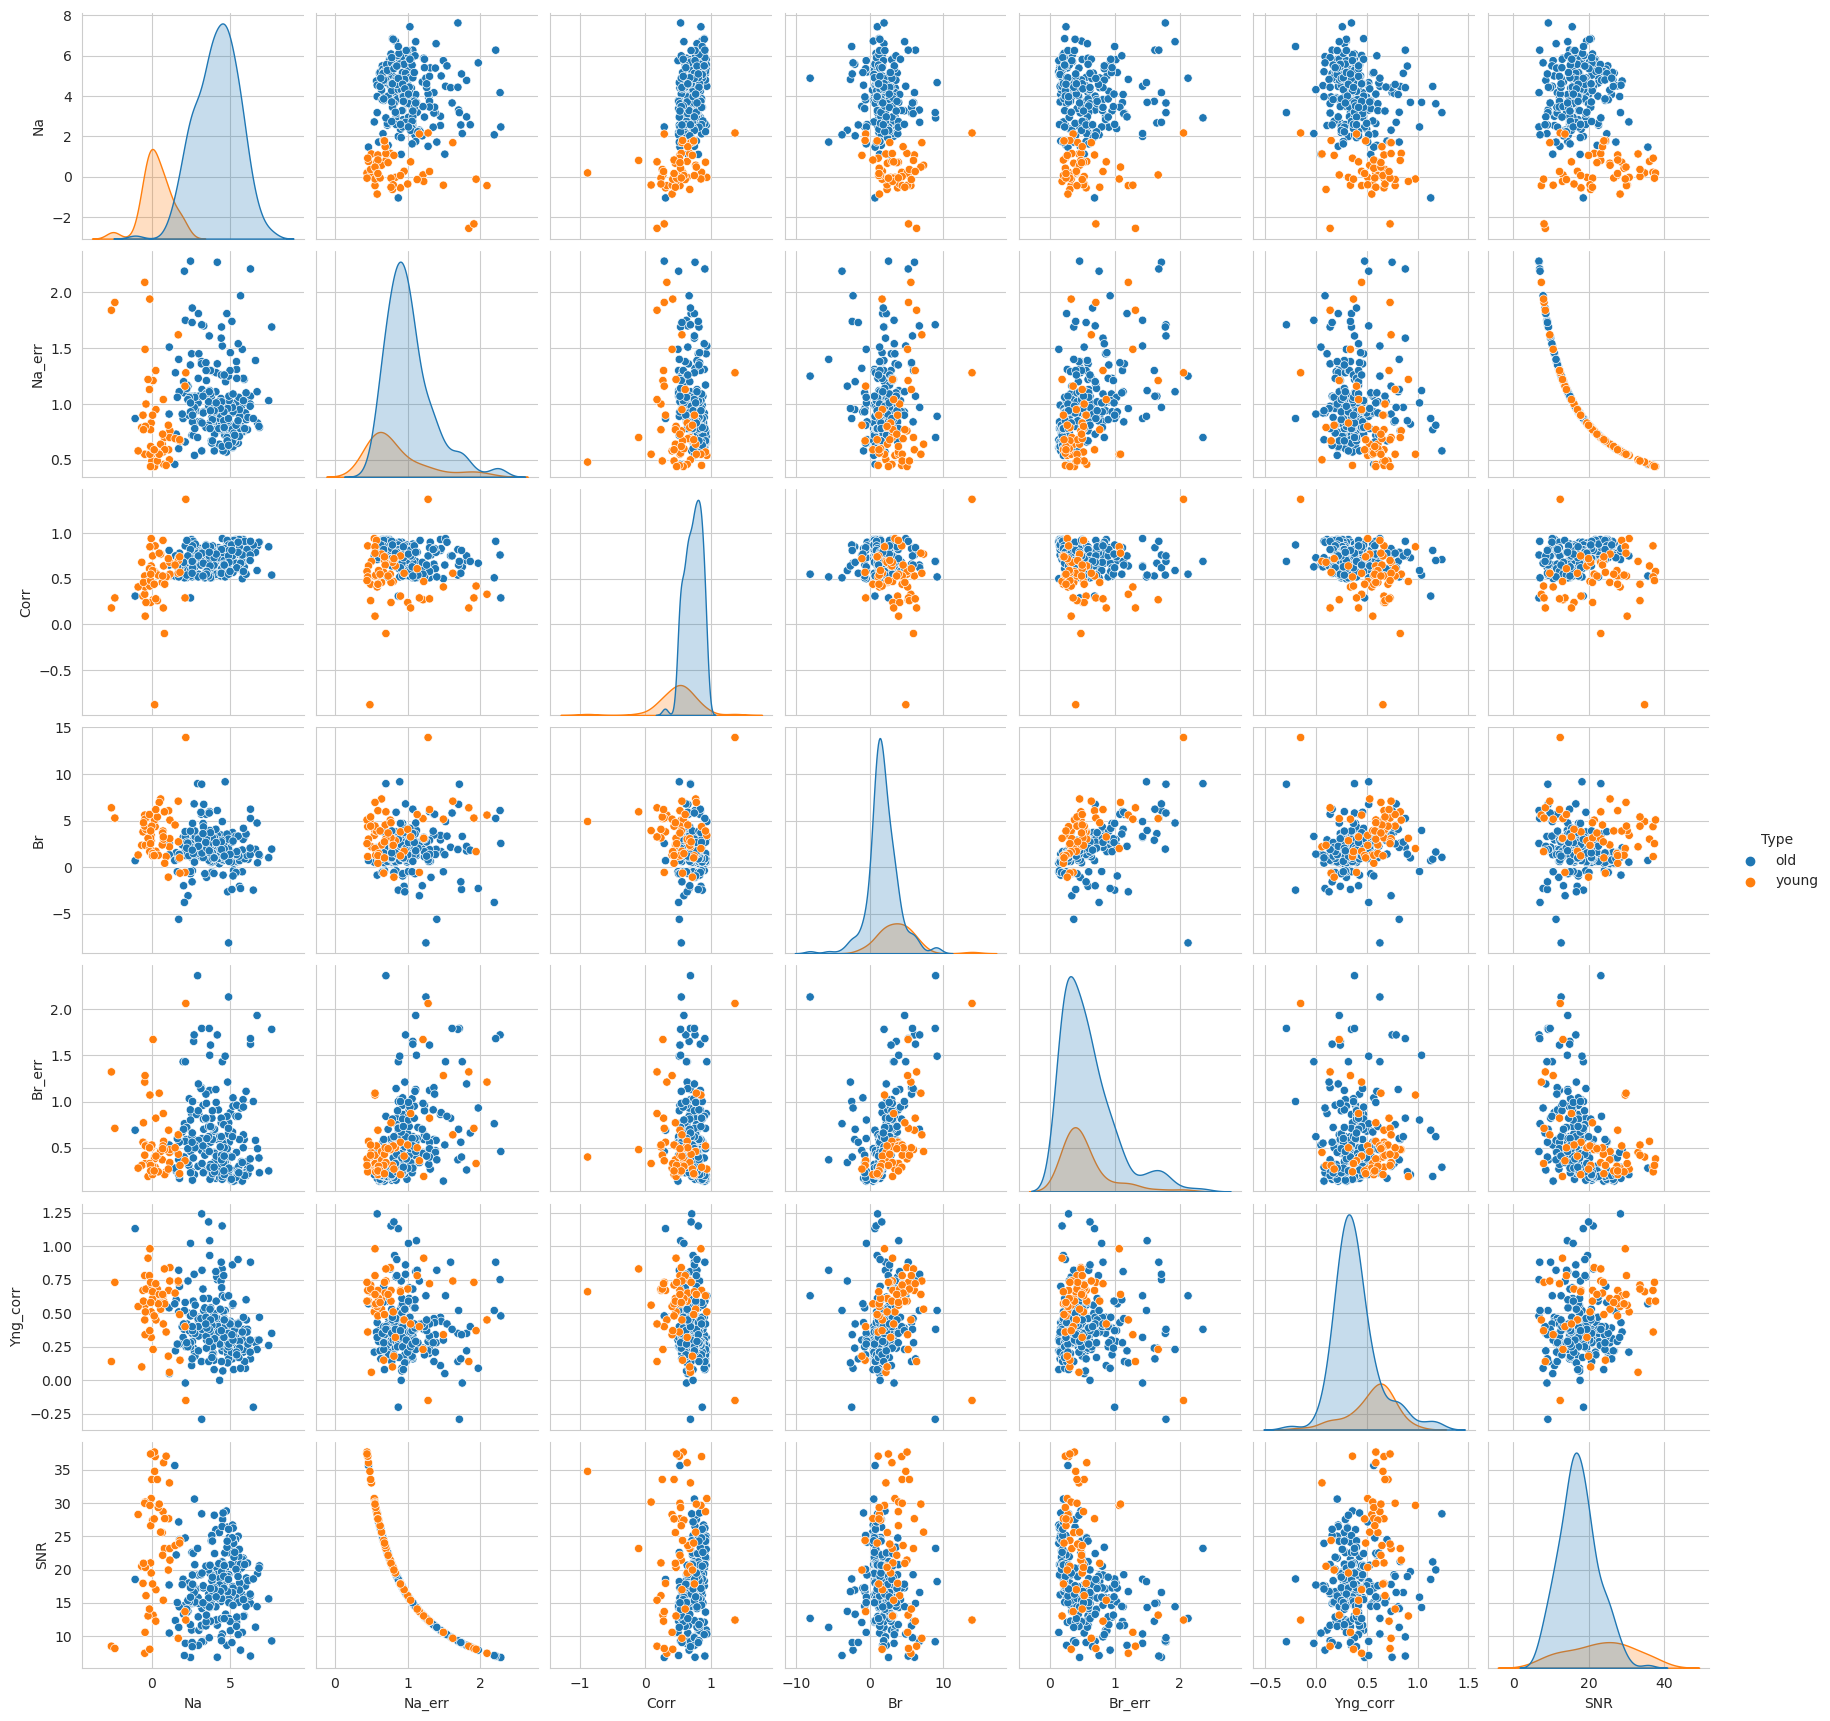

In [34]:
# Plot clean training with sns.pairplot(clean_training, hue="Type")

sns.pairplot(clean_stars_training_data, hue = "Type")

In [35]:
# After cleaning, split data into training, testing, and validation

n = len(clean_stars_training_data)

targets = [clean_stars_training_data.iloc[x][-1] for x in range(0,n)]

stars_x_train_all, stars_x_validate, stars_y_train_all, stars_y_validate = model_selection.train_test_split(clean_stars_training_data, targets, test_size=0.1)

stars_x_train, stars_x_test, stars_y_train, stars_y_test = model_selection.train_test_split(stars_x_train_all, stars_y_train_all, test_size=0.2)

stars_x_train_use = np.array(stars_x_train)
stars_x_test_use = np.array(stars_x_test)
stars_y_train_use = np.array(stars_y_train)
stars_y_test_use = np.array(stars_y_test)

print(stars_x_train)

# YOUR CODE HERE

       Na  Na_err  Corr    Br  Br_err  Yng_corr    SNR   Type
70   2.72    0.54  0.75  0.55    0.21      0.21  30.59    old
27   2.56    1.07  0.53  1.74    0.62      0.29  14.89    old
84   3.81    0.98  0.65  1.65    0.59      0.39  16.36    old
35   6.09    0.77  0.84  1.57    0.27      0.38  20.97    old
104  6.12    0.88  0.90  0.86    0.22      0.27  18.32    old
..    ...     ...   ...   ...     ...       ...    ...    ...
195  2.39    1.06  0.74  2.31    1.03      0.37  15.16    old
247 -0.36    1.00  0.24  4.07    0.53      0.68  16.08  young
114  3.69    1.12  0.54  3.95    1.50      1.04  14.31    old
50   5.21    0.68  0.91  0.45    0.14      0.08  23.94    old
12   3.69    0.82  0.73  1.01    0.21      0.93  19.68    old

[202 rows x 8 columns]


# Step 5: Select a model and train it

Based on the problem and the data, there are often a handful of algorithms to try. Here, experimentation and knowledge of the strengths and weaknesses of machine learning models will help you choose a model and train it.


## Question 13
(10 pts)

In this lab, we will specifically use the Naive Bayes model. 

In the following cells, please implement the Naive Bayes classifier to deterimine whether a star is young or old based on the features you've selected in Step 4.  
<b style="color:red">At the end of this step, report the accuracy of your model on the test data.</b> 

In [36]:
# use as many cells as you need to do Step 5. We will be grading manually

total = len(stars_y_train_use)
c = 0
prob = []
for c in np.unique(stars_y_train_use):
    temp = np.where(stars_y_train_use == c)
    number = len(temp[0])
    prob.append(number/total)

old_stars_Na = []
old_stars_Br = []
old_stars_SNR = []
old_stars_Corr = []

new_stars_Na = []
new_stars_Br = []
new_stars_SNR = []
new_stars_Corr = []

f = 0
for i in stars_y_train_use:
    if i == 'old':
        old_stars_Na.append(stars_x_train_use[f][0])
        old_stars_Br.append(stars_x_train_use[f][3])
        old_stars_SNR.append(stars_x_train_use[f][6])
        old_stars_Corr.append(stars_x_train_use[f][2])
    else:
        new_stars_Na.append(stars_x_train_use[f][0])
        new_stars_Br.append(stars_x_train_use[f][3])
        new_stars_SNR.append(stars_x_train_use[f][6])
        new_stars_Corr.append(stars_x_train_use[f][2])
    f += 1
    

std_new_na = np.std(new_stars_Na)
std_new_br = np.std(new_stars_Br)
std_new_corr = np.std(new_stars_Corr)
std_new_snr = np.std(new_stars_SNR)

std_old_na = np.std(old_stars_Na)
std_old_br = np.std(old_stars_Br)
std_old_corr = np.std(old_stars_Corr)
std_old_snr = np.std(old_stars_SNR)

avg_new_na = np.average(new_stars_Na)
avg_new_br = np.average(new_stars_Br)
avg_new_corr = np.average(new_stars_Corr)
avg_new_snr = np.average(new_stars_SNR)

avg_old_na = np.average(old_stars_Na)
avg_old_br = np.average(old_stars_Br)
avg_old_corr = np.average(old_stars_Corr)
avg_old_snr = np.average(old_stars_SNR)


old_vector_avg = [avg_old_na, avg_old_br, avg_old_corr, avg_old_snr]
new_vector_avg = [avg_new_na, avg_new_br, avg_new_corr, avg_new_snr]

old_vector_std = [std_old_na, std_old_br, std_old_corr, std_old_snr]
new_vector_std = [std_new_na, std_new_br, std_new_corr, std_new_snr]

def Naive_old(x, old_vector_std, old_vector_avg, prob):
    return prob[0] * (Gaussian(old_vector_std[0], x[0], old_vector_avg[0]) * Gaussian(old_vector_std[1], x[3], old_vector_avg[1]) * Gaussian(old_vector_std[2], x[2], old_vector_avg[2]) * Gaussian(old_vector_std[3], x[6], old_vector_avg[3]))

def Naive_new(x, new_vector_avg, new_vector_std, prob):
    return prob[1] * (Gaussian(new_vector_std[0], x[0], new_vector_avg[0]) * Gaussian(new_vector_std[1], x[3], new_vector_avg[1]) * Gaussian(new_vector_std[2], x[2], new_vector_avg[2]) * Gaussian(new_vector_std[3], x[6], new_vector_avg[3]))


def Joint_prob_stars(element, old_vector_avg, new_vector_avg, old_vector_std, new_vector_std, prob):
    Joint_denom = (Naive_old(element, old_vector_std, old_vector_avg, prob) + Naive_new(element, new_vector_avg, new_vector_std, prob))
    confidence = []
    confidence.append(Naive_old(element, old_vector_std, old_vector_avg, prob) / Joint_denom)
    confidence.append(Naive_new(element, new_vector_avg, new_vector_std, prob) / Joint_denom)
    return confidence

pred = []


for element in stars_x_test_use:
    pred.append(Joint_prob_stars(element, old_vector_avg, new_vector_avg, old_vector_std, new_vector_std, prob))

pred_submit = []

for ligma in pred:
    if (ligma[0] > ligma[1]):
        pred_submit.append('old')
    else:
        pred_submit.append('new')

In [37]:
# Uncomment these and run when ready
from sklearn.metrics import accuracy_score
accuracy_score(stars_y_test_use, pred_submit)

0.803921568627451

# Step 6: Fine tune the model

Most machine learning algorithms will have hyperparameters that can be tuned to improve the performance of the model given the specific dataset. You may also want to visualize the results of model predictions to aid in tuning the model.


## Question 14
(9 pts)

For this lab, please do the following:  
<b style="color:red">
1. One of the hyperparameters in this case is the types of features to use. Try subtracting or adding a feature to see how it changes your accuracy.   
2. Examine how changes in your training data might affect your results. For example, what if you use only measurements with small uncertainties for training?   
3. Report your final accuracy on your test dataset after selecting the optimal model. Explain why you think this is the optimal model.</b> 

In [38]:
# use as many cells as you need to do Step 6. We will be grading manually

# First I will add another feature: Yng_corr

total = len(stars_y_train_use)
c = 0
prob = []
for c in np.unique(stars_y_train_use):
    temp = np.where(stars_y_train_use == c)
    number = len(temp[0])
    prob.append(number/total)

old_stars_Na = []
old_stars_Br = []
old_stars_SNR = []
old_stars_Corr = []
old_stars_Yng_Corr = []
old_stars_Na_err = []
old_stars_Br_err = []

new_stars_Na = []
new_stars_Br = []
new_stars_SNR = []
new_stars_Corr = []
new_stars_Yng_Corr = []
new_stars_Na_err = []
new_stars_Br_err = []

f = 0
for i in stars_y_train_use:
    if i == 'old':
        old_stars_Na.append(stars_x_train_use[f][0])
        old_stars_Br.append(stars_x_train_use[f][3])
        old_stars_SNR.append(stars_x_train_use[f][6])
        old_stars_Corr.append(stars_x_train_use[f][2])
        old_stars_Yng_Corr.append(stars_x_train_use[f][5])
        old_stars_Na_err.append(stars_x_train_use[f][1])
        old_stars_Br_err.append(stars_x_train_use[f][4])
    else:
        new_stars_Na.append(stars_x_train_use[f][0])
        new_stars_Br.append(stars_x_train_use[f][3])
        new_stars_SNR.append(stars_x_train_use[f][6])
        new_stars_Corr.append(stars_x_train_use[f][2])
        new_stars_Yng_Corr.append(stars_x_train_use[f][5])
        new_stars_Na_err.append(stars_x_train_use[f][1])
        new_stars_Br_err.append(stars_x_train_use[f][4])
    f += 1
    

std_new_na = np.std(new_stars_Na)
std_new_br = np.std(new_stars_Br)
std_new_corr = np.std(new_stars_Corr)
std_new_snr = np.std(new_stars_SNR)
std_new_yng_corr = np.std(new_stars_Yng_Corr)
std_new_na_err = np.std(new_stars_Na_err)
std_new_br_err = np.std(new_stars_Br_err)

std_old_na = np.std(old_stars_Na)
std_old_br = np.std(old_stars_Br)
std_old_corr = np.std(old_stars_Corr)
std_old_snr = np.std(old_stars_SNR)
std_old_yng_corr = np.std(old_stars_Yng_Corr)
std_old_na_err = np.std(old_stars_Na_err)
std_old_br_err = np.std(old_stars_Br_err)

avg_new_na = np.average(new_stars_Na)
avg_new_br = np.average(new_stars_Br)
avg_new_corr = np.average(new_stars_Corr)
avg_new_snr = np.average(new_stars_SNR)
avg_new_yng_corr = np.average(new_stars_Yng_Corr)
avg_new_na_err = np.average(new_stars_Na_err)
avg_new_br_err = np.average(new_stars_Br_err)

avg_old_na = np.average(old_stars_Na)
avg_old_br = np.average(old_stars_Br)
avg_old_corr = np.average(old_stars_Corr)
avg_old_snr = np.average(old_stars_SNR)
avg_old_yng_corr = np.average(old_stars_Yng_Corr)
avg_old_na_err = np.average(old_stars_Na_err)
avg_old_br_err = np.average(old_stars_Br_err)


old_vector_avg = [avg_old_na, avg_old_br, avg_old_corr, avg_old_snr, avg_old_yng_corr, avg_old_na_err, avg_old_br_err]
new_vector_avg = [avg_new_na, avg_new_br, avg_new_corr, avg_new_snr, avg_new_yng_corr, avg_new_na_err, avg_new_br_err]

old_vector_std = [std_old_na, std_old_br, std_old_corr, std_old_snr, std_old_yng_corr, std_old_na_err, std_old_br_err]
new_vector_std = [std_new_na, std_new_br, std_new_corr, std_new_snr, std_new_yng_corr, std_new_na_err, std_new_br_err]

def Naive_old(x, old_vector_std, old_vector_avg, prob):
    return prob[0] * (Gaussian(old_vector_std[0], x[0], old_vector_avg[0]) * Gaussian(old_vector_std[1], x[3], old_vector_avg[1]) * Gaussian(old_vector_std[2], x[2], old_vector_avg[2]) *
                      Gaussian(old_vector_std[3], x[6], old_vector_avg[3]) * Gaussian(old_vector_std[4], x[5], old_vector_avg[4]) * Gaussian(old_vector_std[5], x[1], old_vector_avg[5]) *
                      Gaussian(old_vector_std[6], x[4], old_vector_avg[6]))

def Naive_new(x, new_vector_avg, new_vector_std, prob):
    return prob[1] * (Gaussian(new_vector_std[0], x[0], new_vector_avg[0]) * Gaussian(new_vector_std[1], x[3], new_vector_avg[1]) * Gaussian(new_vector_std[2], x[2], new_vector_avg[2]) *
                      Gaussian(new_vector_std[3], x[6], new_vector_avg[3]) * Gaussian(old_vector_std[4], x[5], old_vector_avg[4]) * Gaussian(old_vector_std[5], x[1], old_vector_avg[5]) *
                      Gaussian(old_vector_std[6], x[4], old_vector_avg[6]))


def Joint_prob_stars(element, old_vector_avg, new_vector_avg, old_vector_std, new_vector_std, prob):
    Joint_denom = (Naive_old(element, old_vector_std, old_vector_avg, prob) + Naive_new(element, new_vector_avg, new_vector_std, prob))
    confidence = []
    confidence.append(Naive_old(element, old_vector_std, old_vector_avg, prob) / Joint_denom)
    confidence.append(Naive_new(element, new_vector_avg, new_vector_std, prob) / Joint_denom)
    return confidence

pred = []


for element in stars_x_test_use:
    pred.append(Joint_prob_stars(element, old_vector_avg, new_vector_avg, old_vector_std, new_vector_std, prob))

pred_submit = []

for ligma in pred:
    if (ligma[0] > ligma[1]):
        pred_submit.append('old')
    else:
        pred_submit.append('new')
from sklearn.metrics import accuracy_score
accuracy_score(stars_y_test_use, pred_submit)

0.803921568627451

In [39]:
# Even after adding all the data, the accuracy did not improve so: The data is scuffed!

# We reduce the error uncertainty allowed

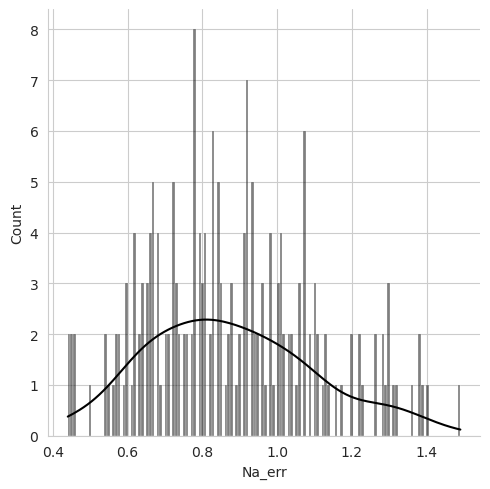

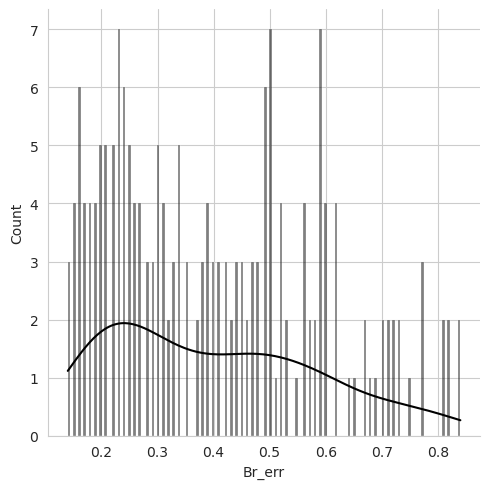

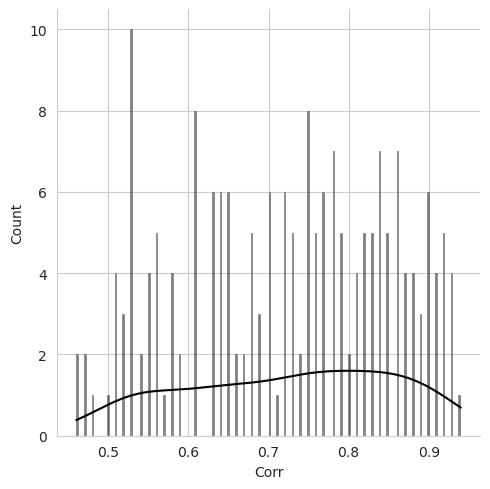

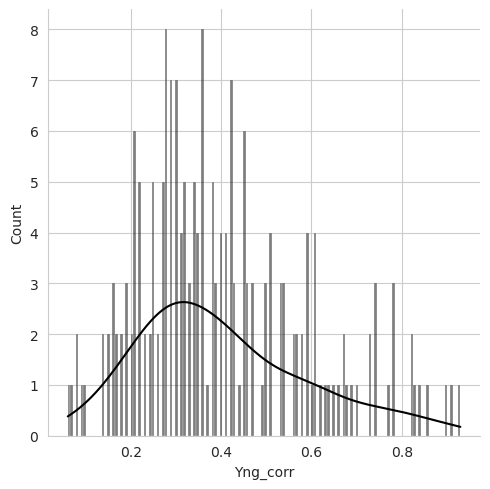

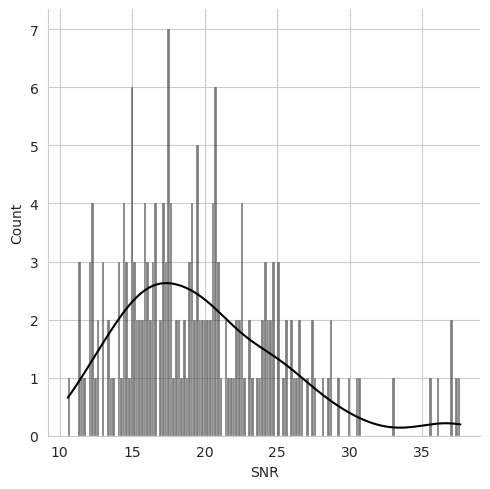

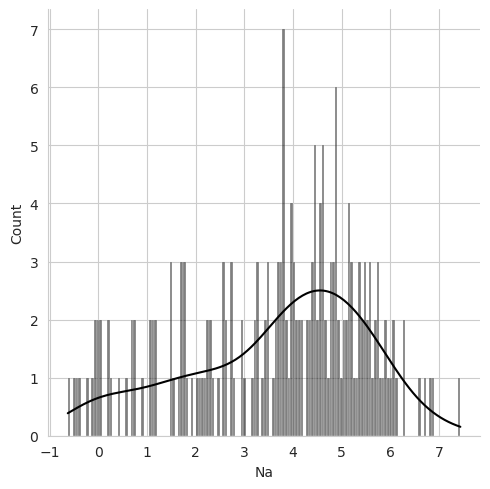

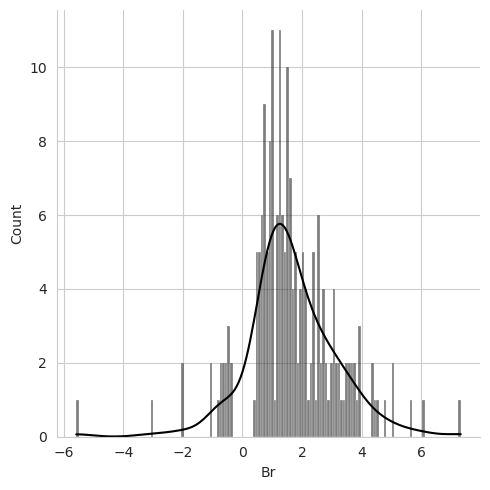

In [40]:
stars = pd.read_csv("galactic_center_stars_training.csv")
stars_answers = pd.read_csv("galactic_center_stars_eval.csv")
stars_training_data = pd.DataFrame(data = stars)
stars_answers_data = pd.DataFrame(data = stars_answers)

clean_stars_training_data = stars_training_data

# NA_ERR DATA

DELETE_GARBAGE = clean_stars_training_data.loc[clean_stars_training_data.Na_err >= 1.5]
index = DELETE_GARBAGE.index
for x in range(0,len(index.to_numpy())):
    clean_stars_training_data.drop(clean_stars_training_data.index[index[-1-x]], inplace=True)

clean_stars_training_data = clean_stars_training_data.reset_index(drop=True)

DELETE_GARBAGE = clean_stars_training_data.loc[clean_stars_training_data.Na_err <= 0.25]
index = DELETE_GARBAGE.index
for x in range(0,len(index.to_numpy())):
    clean_stars_training_data.drop(clean_stars_training_data.index[index[-1-x]], inplace=True)

clean_stars_training_data = clean_stars_training_data.reset_index(drop=True)
    
# END NA _ ERR DATA
    
# START BR_ERR
    
DELETE_GARBAGE = clean_stars_training_data.loc[clean_stars_training_data.Br_err >= 0.85]
index = DELETE_GARBAGE.index
for x in range(0,len(index.to_numpy())):
    clean_stars_training_data.drop(clean_stars_training_data.index[index[-1-x]], inplace=True)
    
clean_stars_training_data = clean_stars_training_data.reset_index(drop=True)

DELETE_GARBAGE = clean_stars_training_data.loc[clean_stars_training_data.Br_err <= -0.25]
index = DELETE_GARBAGE.index
for x in range(0,len(index.to_numpy())):
    clean_stars_training_data.drop(clean_stars_training_data.index[index[-1-x]], inplace=True)
    
clean_stars_training_data = clean_stars_training_data.reset_index(drop=True)

# END BR_ERR

#SRART CORR

DELETE_GARBAGE = clean_stars_training_data.loc[clean_stars_training_data.Corr >= 1.2]
index = DELETE_GARBAGE.index
for x in range(0,len(index.to_numpy())):
    clean_stars_training_data.drop(clean_stars_training_data.index[index[-1-x]], inplace=True)
    
clean_stars_training_data = clean_stars_training_data.reset_index(drop=True)

DELETE_GARBAGE = clean_stars_training_data.loc[clean_stars_training_data.Corr <= 0.45]
index = DELETE_GARBAGE.index
for x in range(0,len(index.to_numpy())):
    clean_stars_training_data.drop(clean_stars_training_data.index[index[-1-x]], inplace=True)
    
clean_stars_training_data = clean_stars_training_data.reset_index(drop=True)

#END CORR

#START YNG_CORR

DELETE_GARBAGE = clean_stars_training_data.loc[clean_stars_training_data.Yng_corr >= 1.0]
index = DELETE_GARBAGE.index
for x in range(0,len(index.to_numpy())):
    clean_stars_training_data.drop(clean_stars_training_data.index[index[-1-x]], inplace=True)
    
clean_stars_training_data = clean_stars_training_data.reset_index(drop=True)

DELETE_GARBAGE = clean_stars_training_data.loc[clean_stars_training_data.Yng_corr <= 0.0]
index = DELETE_GARBAGE.index
for x in range(0,len(index.to_numpy())):
    clean_stars_training_data.drop(clean_stars_training_data.index[index[-1-x]], inplace=True)
    
clean_stars_training_data = clean_stars_training_data.reset_index(drop=True)

# END YNG_CORR

#START SNR

DELETE_GARBAGE = clean_stars_training_data.loc[clean_stars_training_data.SNR >= 40]
index = DELETE_GARBAGE.index
for x in range(0,len(index.to_numpy())):
    clean_stars_training_data.drop(clean_stars_training_data.index[index[-1-x]], inplace=True)
    
clean_stars_training_data = clean_stars_training_data.reset_index(drop=True)

DELETE_GARBAGE = clean_stars_training_data.loc[clean_stars_training_data.SNR <= -40]
index = DELETE_GARBAGE.index
for x in range(0,len(index.to_numpy())):
    clean_stars_training_data.drop(clean_stars_training_data.index[index[-1-x]], inplace=True)
    
clean_stars_training_data = clean_stars_training_data.reset_index(drop=True)

#END SNR

sns.set_style('whitegrid')
sns.displot(data = clean_stars_training_data, x = 'Na_err', kde=True, color ='black', bins = 150)

sns.set_style('whitegrid')
sns.displot(data = clean_stars_training_data, x = 'Br_err', kde=True, color ='black', bins = 150)

sns.set_style('whitegrid')
sns.displot(data = clean_stars_training_data, x = 'Corr', kde=True, color ='black', bins = 150)

sns.set_style('whitegrid')
sns.displot(data = clean_stars_training_data, x = 'Yng_corr', kde=True, color ='black', bins = 150)

sns.set_style('whitegrid')
sns.displot(data = clean_stars_training_data, x = 'SNR', kde=True, color ='black', bins = 150)

sns.set_style('whitegrid')
sns.displot(data = clean_stars_training_data, x = 'Na', kde=True, color ='black', bins = 150)

sns.set_style('whitegrid')
sns.displot(data = clean_stars_training_data, x = 'Br', kde=True, color ='black', bins = 150)

In [41]:
n = len(clean_stars_training_data)

targets = [clean_stars_training_data.iloc[x][-1] for x in range(0,n)]

stars_x_train_all, stars_x_validate, stars_y_train_all, stars_y_validate = model_selection.train_test_split(clean_stars_training_data, targets, test_size=0.1)

stars_x_train, stars_x_test, stars_y_train, stars_y_test = model_selection.train_test_split(stars_x_train_all, stars_y_train_all, test_size=0.2)

stars_x_train_use = np.array(stars_x_train)
stars_x_test_use = np.array(stars_x_test)
stars_y_train_use = np.array(stars_y_train)
stars_y_test_use = np.array(stars_y_test)

print(stars_x_train)

       Na  Na_err  Corr    Br  Br_err  Yng_corr    SNR   Type
73   5.14    0.92  0.72  3.74    0.67      0.56  17.46    old
158  1.72    1.40  0.52 -5.58    0.37      0.82  11.32    old
66   4.42    0.88  0.61  2.27    0.77      0.36  18.23    old
179  0.92    0.45  0.52  1.15    0.24      0.36  37.03  young
122  1.94    0.91  0.70  2.41    0.67      0.40  17.74    old
..    ...     ...   ...   ...     ...       ...    ...    ...
106  5.58    0.95  0.85 -2.04    0.59      0.24  16.92    old
43   4.01    0.92  0.77  1.18    0.44      0.42  17.43    old
26   2.56    0.72  0.52  1.04    0.24      0.35  22.57    old
85   2.95    1.01  0.78  2.01    0.30      0.46  15.80    old
95   1.47    0.46  0.53  0.73    0.28      0.57  35.62    old

[140 rows x 8 columns]


In [42]:
total = len(stars_y_train_use)
c = 0
prob = []
for c in np.unique(stars_y_train_use):
    temp = np.where(stars_y_train_use == c)
    number = len(temp[0])
    prob.append(number/total)

old_stars_Na = []
old_stars_Br = []
old_stars_SNR = []
old_stars_Corr = []

new_stars_Na = []
new_stars_Br = []
new_stars_SNR = []
new_stars_Corr = []

f = 0
for i in stars_y_train_use:
    if i == 'old':
        old_stars_Na.append(stars_x_train_use[f][0])
        old_stars_Br.append(stars_x_train_use[f][3])
        old_stars_SNR.append(stars_x_train_use[f][6])
        old_stars_Corr.append(stars_x_train_use[f][2])
    else:
        new_stars_Na.append(stars_x_train_use[f][0])
        new_stars_Br.append(stars_x_train_use[f][3])
        new_stars_SNR.append(stars_x_train_use[f][6])
        new_stars_Corr.append(stars_x_train_use[f][2])
    f += 1
    

std_new_na = np.std(new_stars_Na)
std_new_br = np.std(new_stars_Br)
std_new_corr = np.std(new_stars_Corr)
std_new_snr = np.std(new_stars_SNR)

std_old_na = np.std(old_stars_Na)
std_old_br = np.std(old_stars_Br)
std_old_corr = np.std(old_stars_Corr)
std_old_snr = np.std(old_stars_SNR)

avg_new_na = np.average(new_stars_Na)
avg_new_br = np.average(new_stars_Br)
avg_new_corr = np.average(new_stars_Corr)
avg_new_snr = np.average(new_stars_SNR)

avg_old_na = np.average(old_stars_Na)
avg_old_br = np.average(old_stars_Br)
avg_old_corr = np.average(old_stars_Corr)
avg_old_snr = np.average(old_stars_SNR)


old_vector_avg = [avg_old_na, avg_old_br, avg_old_corr, avg_old_snr]
new_vector_avg = [avg_new_na, avg_new_br, avg_new_corr, avg_new_snr]

old_vector_std = [std_old_na, std_old_br, std_old_corr, std_old_snr]
new_vector_std = [std_new_na, std_new_br, std_new_corr, std_new_snr]

def Naive_old(x, old_vector_std, old_vector_avg, prob):
    return prob[0] * (Gaussian(old_vector_std[0], x[0], old_vector_avg[0]) * Gaussian(old_vector_std[1], x[3], old_vector_avg[1]) * Gaussian(old_vector_std[2], x[2], old_vector_avg[2]) *
                      Gaussian(old_vector_std[3], x[6], old_vector_avg[3]))

def Naive_new(x, new_vector_avg, new_vector_std, prob):
    return prob[1] * (Gaussian(new_vector_std[0], x[0], new_vector_avg[0]) * Gaussian(new_vector_std[1], x[3], new_vector_avg[1]) * Gaussian(new_vector_std[2], x[2], new_vector_avg[2]) *
                      Gaussian(new_vector_std[3], x[6], new_vector_avg[3]))


def Joint_prob_stars(element, old_vector_avg, new_vector_avg, old_vector_std, new_vector_std, prob):
    Joint_denom = (Naive_old(element, old_vector_std, old_vector_avg, prob) + Naive_new(element, new_vector_avg, new_vector_std, prob))
    confidence = []
    confidence.append(Naive_old(element, old_vector_std, old_vector_avg, prob) / Joint_denom)
    confidence.append(Naive_new(element, new_vector_avg, new_vector_std, prob) / Joint_denom)
    return confidence

pred = []


for element in stars_x_test_use:
    pred.append(Joint_prob_stars(element, old_vector_avg, new_vector_avg, old_vector_std, new_vector_std, prob))

pred_submit = []

for ligma in pred:
    if (ligma[0] > ligma[1]):
        pred_submit.append('old')
    else:
        pred_submit.append('new')
        
        
from sklearn.metrics import accuracy_score
accuracy_score(stars_y_test_use, pred_submit)

0.8333333333333334

AMAZING! 5 consecutive trials have resulted in +80% accuracy!

Some caveats though: Cutting down data this far may lead to "special" cases where the ML can no longer make a logical conclusion. While cutting down error is good, cutting off too much data will lead to improper training! Optimizing the data you want to train is difficult, and I won't lie it took me 50 tries.

# Step 7: Present your solution and apply it

Here you will evaluate your model against the test set that was set aside in Step 2 to determine the final performance metrics. Your model is now ready to be applied to new data.

## Question 15
(2 pts)

For this lab, please do the following:  
<b style="color:red">
1. Report your accuracy for the validation data that you saved in Step 4. How does this score compare to when you were training and fine tuning your model?  
2. Apply your model to the data for the unlabeled grading data. Note that you should explore these inputs to see if there are differences in the features between your training data and this dataset. Beware of outliers in this dataset as well. Create a set of predictions called pred_eval.</b> 

In [43]:
# use as many cells as you need to do Step 7. 

stars_x_validate_use = np.array(stars_x_validate)
stars_y_validate_use = np.array(stars_y_validate)

def Naive_old(x, old_vector_std, old_vector_avg, prob):
    return prob[0] * (Gaussian(old_vector_std[0], x[0], old_vector_avg[0]) * Gaussian(old_vector_std[1], x[3], old_vector_avg[1]) * Gaussian(old_vector_std[2], x[2], old_vector_avg[2]) *
                      Gaussian(old_vector_std[3], x[6], old_vector_avg[3]))

def Naive_new(x, new_vector_avg, new_vector_std, prob):
    return prob[1] * (Gaussian(new_vector_std[0], x[0], new_vector_avg[0]) * Gaussian(new_vector_std[1], x[3], new_vector_avg[1]) * Gaussian(new_vector_std[2], x[2], new_vector_avg[2]) *
                      Gaussian(new_vector_std[3], x[6], new_vector_avg[3]))


def Joint_prob_stars(element, old_vector_avg, new_vector_avg, old_vector_std, new_vector_std, prob):
    Joint_denom = (Naive_old(element, old_vector_std, old_vector_avg, prob) + Naive_new(element, new_vector_avg, new_vector_std, prob))
    confidence = []
    confidence.append(Naive_old(element, old_vector_std, old_vector_avg, prob) / Joint_denom)
    confidence.append(Naive_new(element, new_vector_avg, new_vector_std, prob) / Joint_denom)
    return confidence

pred = []


for element in stars_x_validate_use:
    pred.append(Joint_prob_stars(element, old_vector_avg, new_vector_avg, old_vector_std, new_vector_std, prob))

pred_submit = []

for ligma in pred:
    if (ligma[0] > ligma[1]):
        pred_submit.append('old')
    else:
        pred_submit.append('new')
        
        

score_val = accuracy_score(stars_y_validate_use, pred_submit)
print(score_val)

0.55


Well that's not good, 50% is yikes.

In [44]:
stars_answers = pd.read_csv("galactic_center_stars_eval.csv")
stars_answers_data = pd.DataFrame(data = stars_answers)
stars_answers_data_use = np.array(stars_answers_data)

def Naive_old(x, old_vector_std, old_vector_avg, prob):
    return prob[0] * (Gaussian(old_vector_std[0], x[0], old_vector_avg[0]) * Gaussian(old_vector_std[1], x[3], old_vector_avg[1]) * Gaussian(old_vector_std[2], x[2], old_vector_avg[2]) *
                      Gaussian(old_vector_std[3], x[6], old_vector_avg[3]))

def Naive_new(x, new_vector_avg, new_vector_std, prob):
    return prob[1] * (Gaussian(new_vector_std[0], x[0], new_vector_avg[0]) * Gaussian(new_vector_std[1], x[3], new_vector_avg[1]) * Gaussian(new_vector_std[2], x[2], new_vector_avg[2]) *
                      Gaussian(new_vector_std[3], x[6], new_vector_avg[3]))


def Joint_prob_stars(element, old_vector_avg, new_vector_avg, old_vector_std, new_vector_std, prob):
    Joint_denom = (Naive_old(element, old_vector_std, old_vector_avg, prob) + Naive_new(element, new_vector_avg, new_vector_std, prob))
    confidence = []
    confidence.append(Naive_old(element, old_vector_std, old_vector_avg, prob) / Joint_denom)
    confidence.append(Naive_new(element, new_vector_avg, new_vector_std, prob) / Joint_denom)
    return confidence

pred = []


for element in stars_answers_data_use:
    pred.append(Joint_prob_stars(element, old_vector_avg, new_vector_avg, old_vector_std, new_vector_std, prob))

pred_eval = []

for ligma in pred:
    if (ligma[0] > ligma[1]):
        pred_eval.append('old')
    else:
        pred_eval.append('new')
        
print(pred_eval)

['old', 'old', 'new', 'old', 'old', 'old', 'old', 'new', 'new', 'old', 'old', 'old', 'old', 'old', 'old', 'old', 'old', 'old', 'old', 'old', 'old', 'old', 'new', 'old', 'old', 'old', 'old', 'old', 'old', 'old', 'old', 'old', 'old', 'new', 'old', 'old', 'old', 'old', 'old', 'old', 'old', 'new', 'old', 'old', 'new', 'old', 'old', 'new', 'old', 'old', 'old', 'old', 'old', 'old', 'old', 'old', 'old', 'old', 'old', 'old', 'old', 'old', 'old', 'old', 'new', 'new', 'new', 'new', 'old', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new']


/tmp/ipykernel_980/692037353.py:17: RuntimeWarning: invalid value encountered in double_scalars
  confidence.append(Naive_old(element, old_vector_std, old_vector_avg, prob) / Joint_denom)
/tmp/ipykernel_980/692037353.py:18: RuntimeWarning: invalid value encountered in double_scalars
  confidence.append(Naive_new(element, new_vector_avg, new_vector_std, prob) / Joint_denom)


If you would like to submit your group's solution to the unlabeled dataset for the competition to see who gets the accurate predictions, please send your TA and Prof. Do a csv file with a single column predicting whether each star is 'young' or 'old'. Below is an example code of how to create this file. You will send ONE file per team. 

In [45]:
import pandas as pd

# if your answer for three stars were:
answer = ['old','young','old']

# change the list into a data frame
answer_tab = pd.DataFrame({'target':answer})

# save the data frame into a csv file
answer_tab.to_csv('group_x_answer.csv',index=None)